# Set up the environment

In [1]:
import rickpy
from rickpy import ProgressBar

In [2]:
import unittest


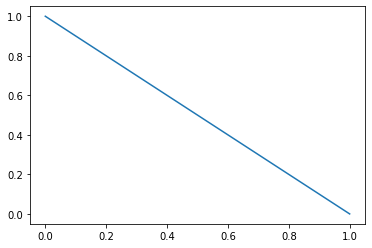

gets here
    1 +-----------------------------------------------------------------------------------------+
      |                                                                                 ******  |
      |                                                                        spi************* |
  0.8 |                                                                      *****              |
      |                                                                ******                   |
      |                                                           *****                         |
  0.6 |                                                     ******                              |
      |                                               ******                                    |
      |                                          *****                                          |
      |                                    ******                                               |
  0.4 |   

INFO:root:test
INFO:root:test


agg


In [3]:
import warnings
warnings.filterwarnings("ignore")
#warnings.filter()
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.plot([0,1],[1,0])
plt.show()
from neuronunit.unit_test.working import hide_imports
from neuronunit.optimisation.optimization_management import inject_and_plot_model, inject_and_plot_passive_model
plot_backend = mpl.get_backend()
print(plot_backend)
from neuronunit.optimisation.optimization_management import check_match_front

import copy

# Design simulated data tests

In [4]:
def jrt(use_test,backend):
    use_test = hide_imports.TSD(use_test)
    use_test.use_rheobase_score = True
    edges = hide_imports.model_parameters.MODEL_PARAMS[backend]

    OM = hide_imports.OptMan(use_test,\
                backend=backend,\
                boundary_dict=edges,\
                protocol={'allen': False, 'elephant': True})

    return OM



In [5]:
test_frame = hide_imports.get_neab.process_all_cells()
test_frame.pop('Olfactory bulb (main) mitral cell',None)
stds = {}
for k,v in hide_imports.TSD(test_frame['Neocortex pyramidal cell layer 5-6']).items():
    temp = hide_imports.TSD(test_frame['Neocortex pyramidal cell layer 5-6'])[k]
    stds[k] = temp.observation['std']
    #print((temp.name,temp.observation))
#OMObjects = []
#backends = ["RAW"]
cloned_tests = copy.copy(test_frame['Neocortex pyramidal cell layer 5-6'])
#for b in backends:        
OM = jrt(cloned_tests,"RAW")
#    OMObjects.append(OM)
rt_outs = []

In [6]:
#for OM in OMObjects:
print(OM.backend)
x= {k:v for k,v in OM.tests.items() if 'mean' in v.observation.keys() or 'value' in v.observation.keys()}
cloned_tests = copy.copy(OM.tests)
OM.tests = hide_imports.TSD(cloned_tests)
rt_out = OM.simulate_data(OM.tests,OM.backend,OM.boundary_dict)
target = rt_out[0]
#print(rt_out)


RAW
Random simulated data tests made


In [7]:
penultimate_tests = hide_imports.TSD(test_frame['Neocortex pyramidal cell layer 5-6'])
for k,v in penultimate_tests.items():
    temp = penultimate_tests[k]

    v = rt_out[1][k].observation
    v['std'] = stds[k]
simulated_data_tests = hide_imports.TSD(penultimate_tests)

# Show what the randomly generated target waveform the optimizer needs to find actually looks like

(AnalogSignal with 1 channels of length 130000; units mV; datatype float64 
 sampling rate: 100.0
 time: 0.0 to 1.3,
 <module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>)

<Figure size 432x288 with 0 Axes>

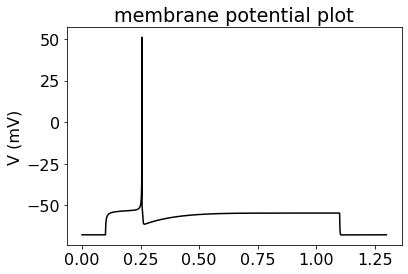

In [8]:
target = rt_out[0]
target.rheobase
inject_and_plot_model(target)


(AnalogSignal with 1 channels of length 80000; units mV; datatype float64 
 sampling rate: 100.0
 time: 0.0 to 0.8,
 <module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>)

<Figure size 432x288 with 0 Axes>

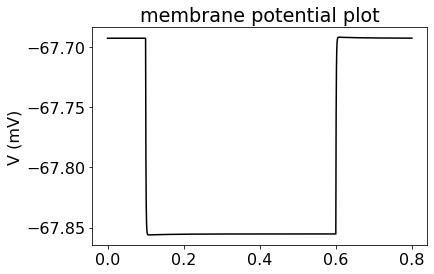

In [9]:

plt.clf()
inject_and_plot_passive_model(target)

In [10]:
from scipy.stats import linregress


(10, 1)


,RheobaseTest,total
observations,72.7020263671875 pA,NaN
predictions,72.7294921875 pA,NaN
scores,0.000128575,0.000129


(10, 1)


,InputResistanceTest,total
observations,58628137.94655039 kg*m**2/(s**3*A**2),NaN
predictions,57578905.31369724 kg*m**2/(s**3*A**2),NaN
scores,0.00023839,0.000238


(10, 1)


,TimeConstantTest,total
observations,9.226167226320628 ms,NaN
predictions,9.222228219273292 ms,NaN
scores,0.000429938,0.00043


(10, 1)


,CapacitanceTest,total
observations,1.5736756358750236e-10 s**4*A**2/(kg*m**2),NaN
predictions,1.5779271741489075e-10 s**4*A**2/(kg*m**2),NaN
scores,0.00243146,0.002431


(10, 1)


,RestingPotentialTest,total
observations,-65.22591394962235 mV,NaN
predictions,-66.3315268976254 mV,NaN
scores,0.144334,0.144334


(10, 1)


,InjectedCurrentAPWidthTest,total
observations,0.005200000000000001 s,NaN
predictions,0.005070000000000001 s,NaN
scores,0.0458057,0.045806


(10, 1)


,InjectedCurrentAPAmplitudeTest,total
observations,2.21295127315404 mV,NaN
predictions,1.7560968135460158 mV,NaN
scores,0.0147724,0.014772


(10, 1)


,InjectedCurrentAPThresholdTest,total
observations,-55.06172900872729 mV,NaN
predictions,-59.63924499805196 mV,NaN
scores,0.563596,0.563596


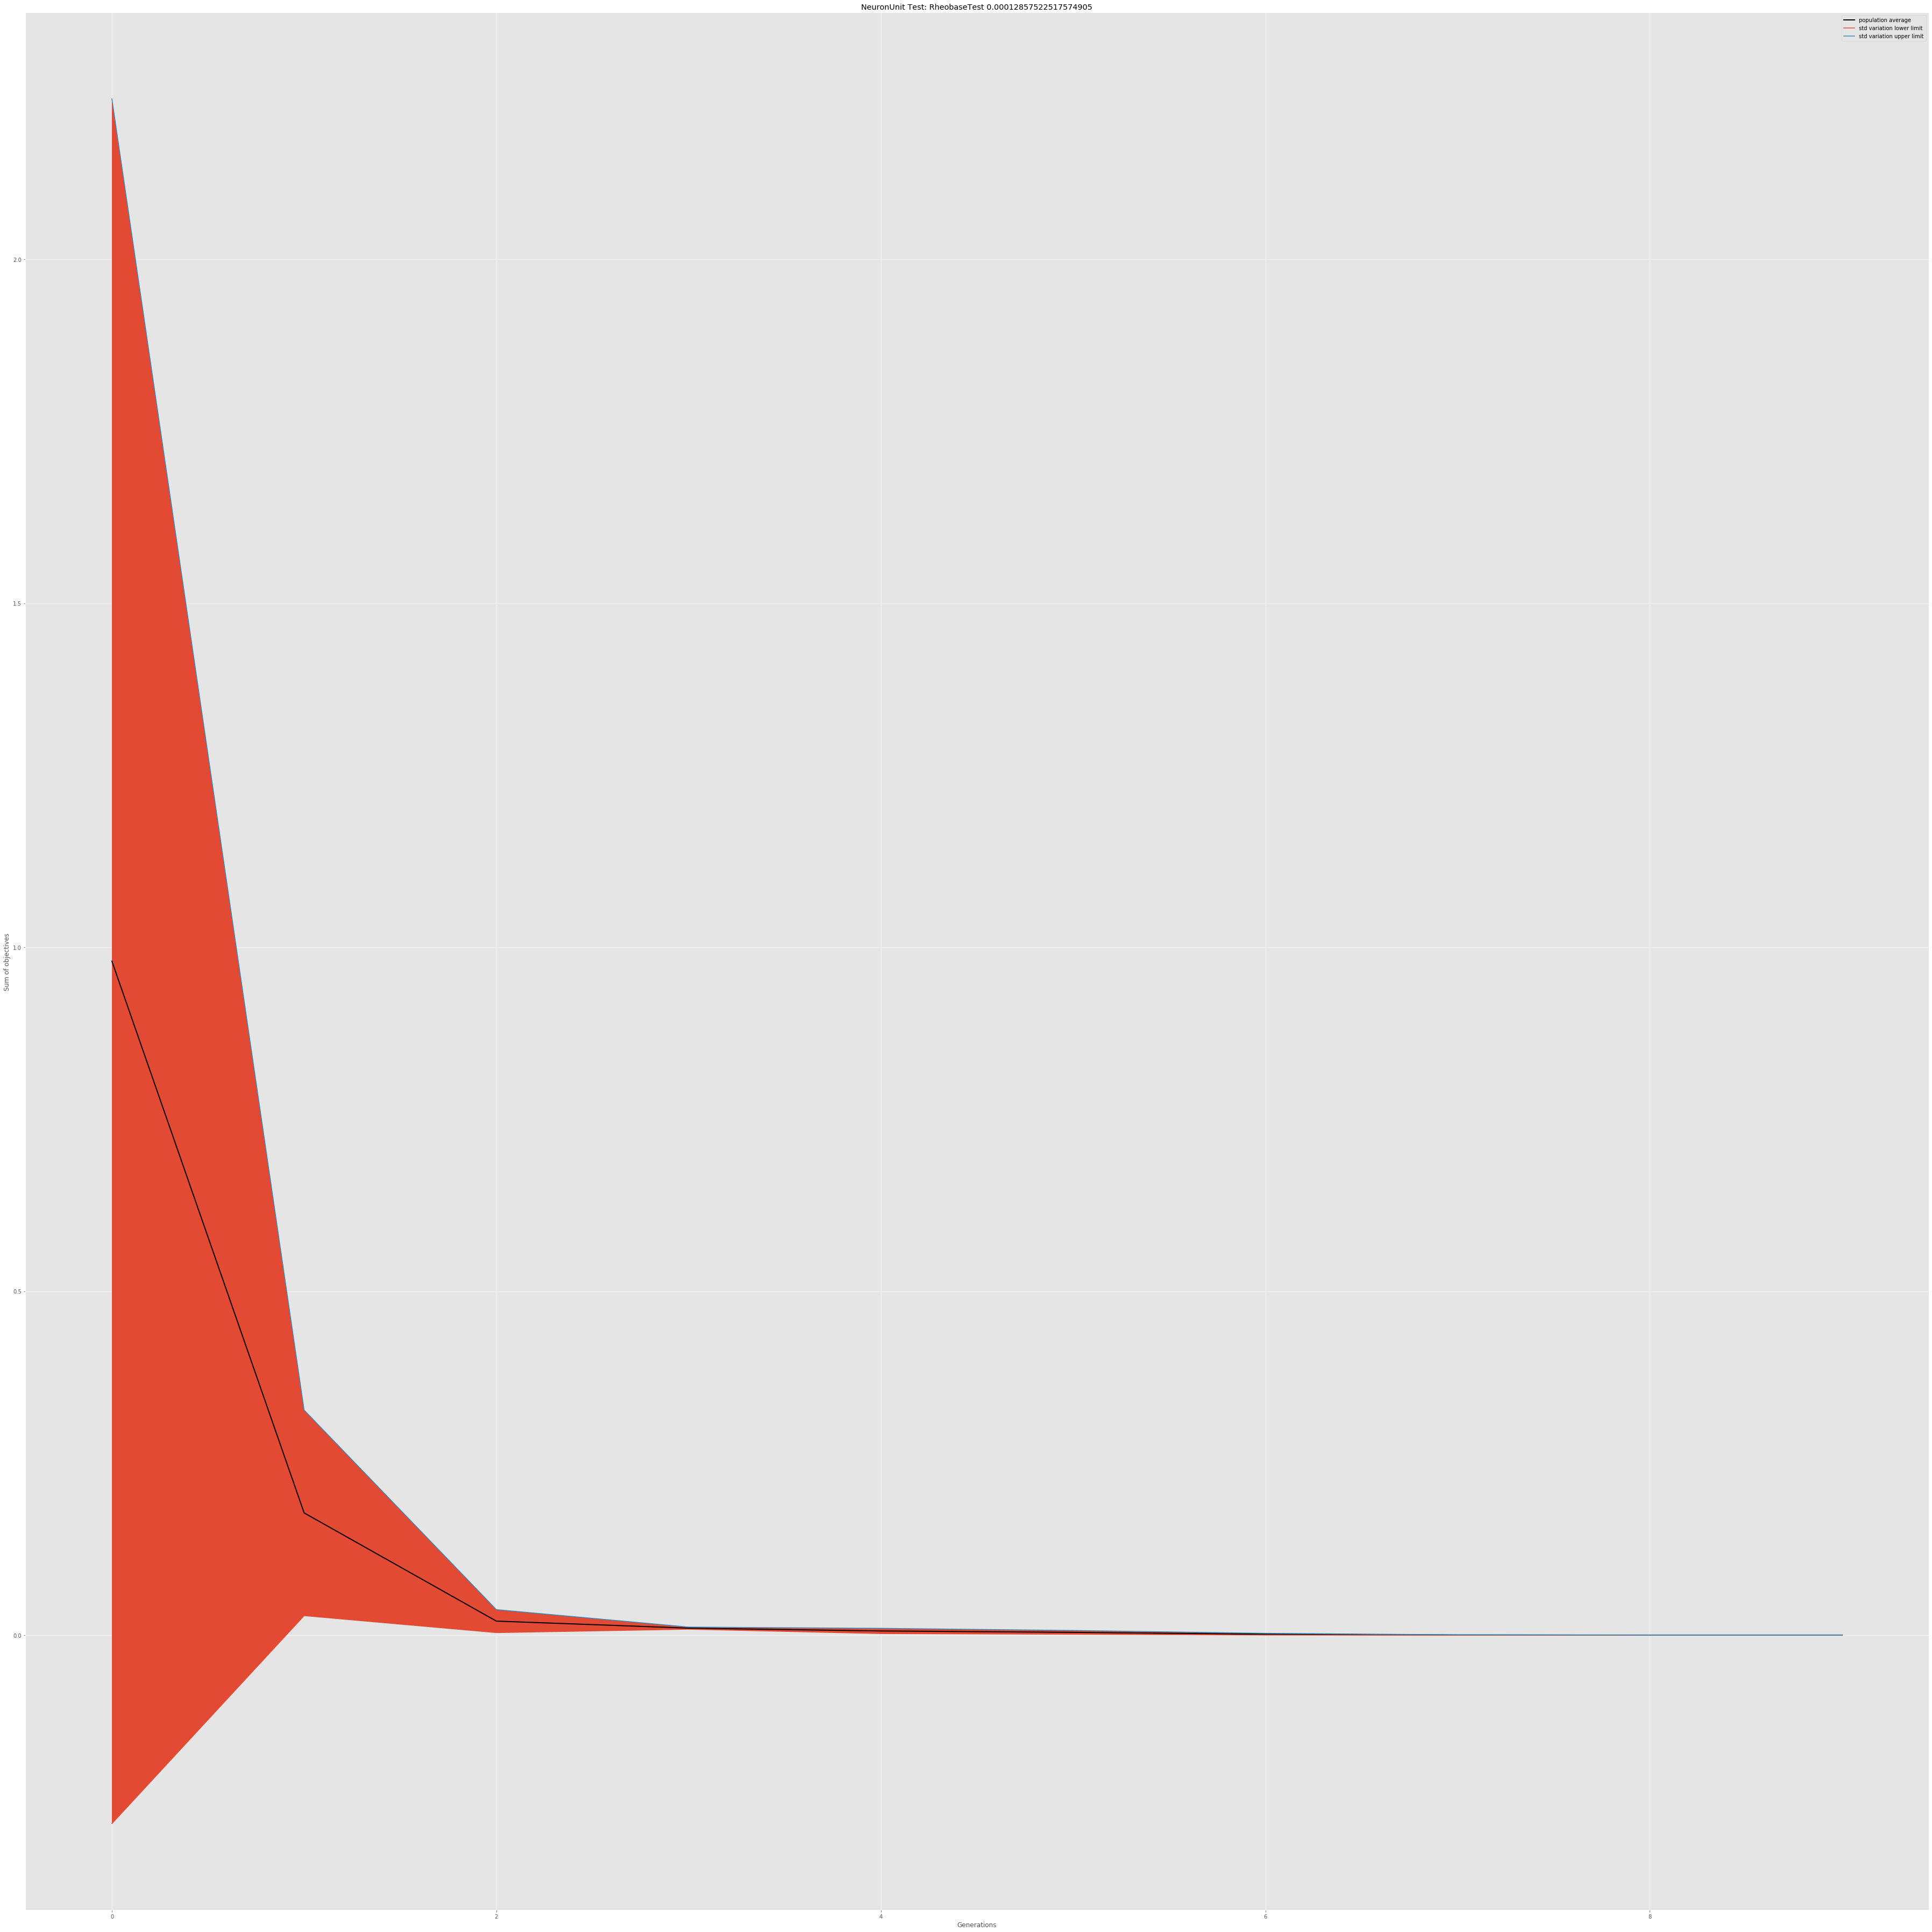

<Figure size 3600x3600 with 0 Axes>

<Figure size 432x288 with 0 Axes>

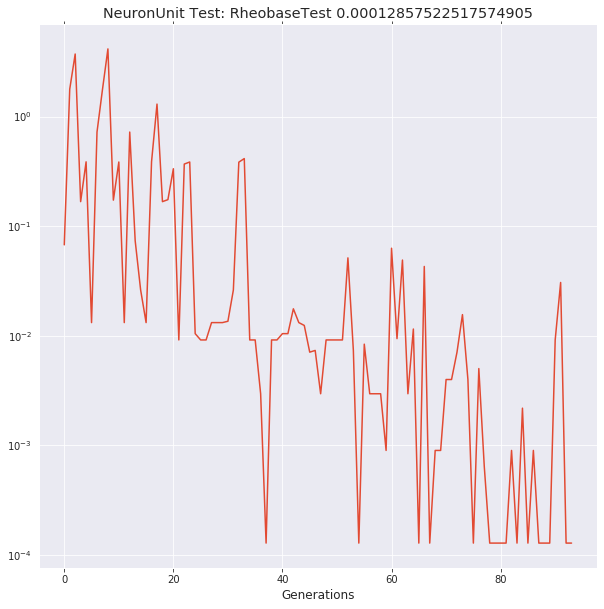

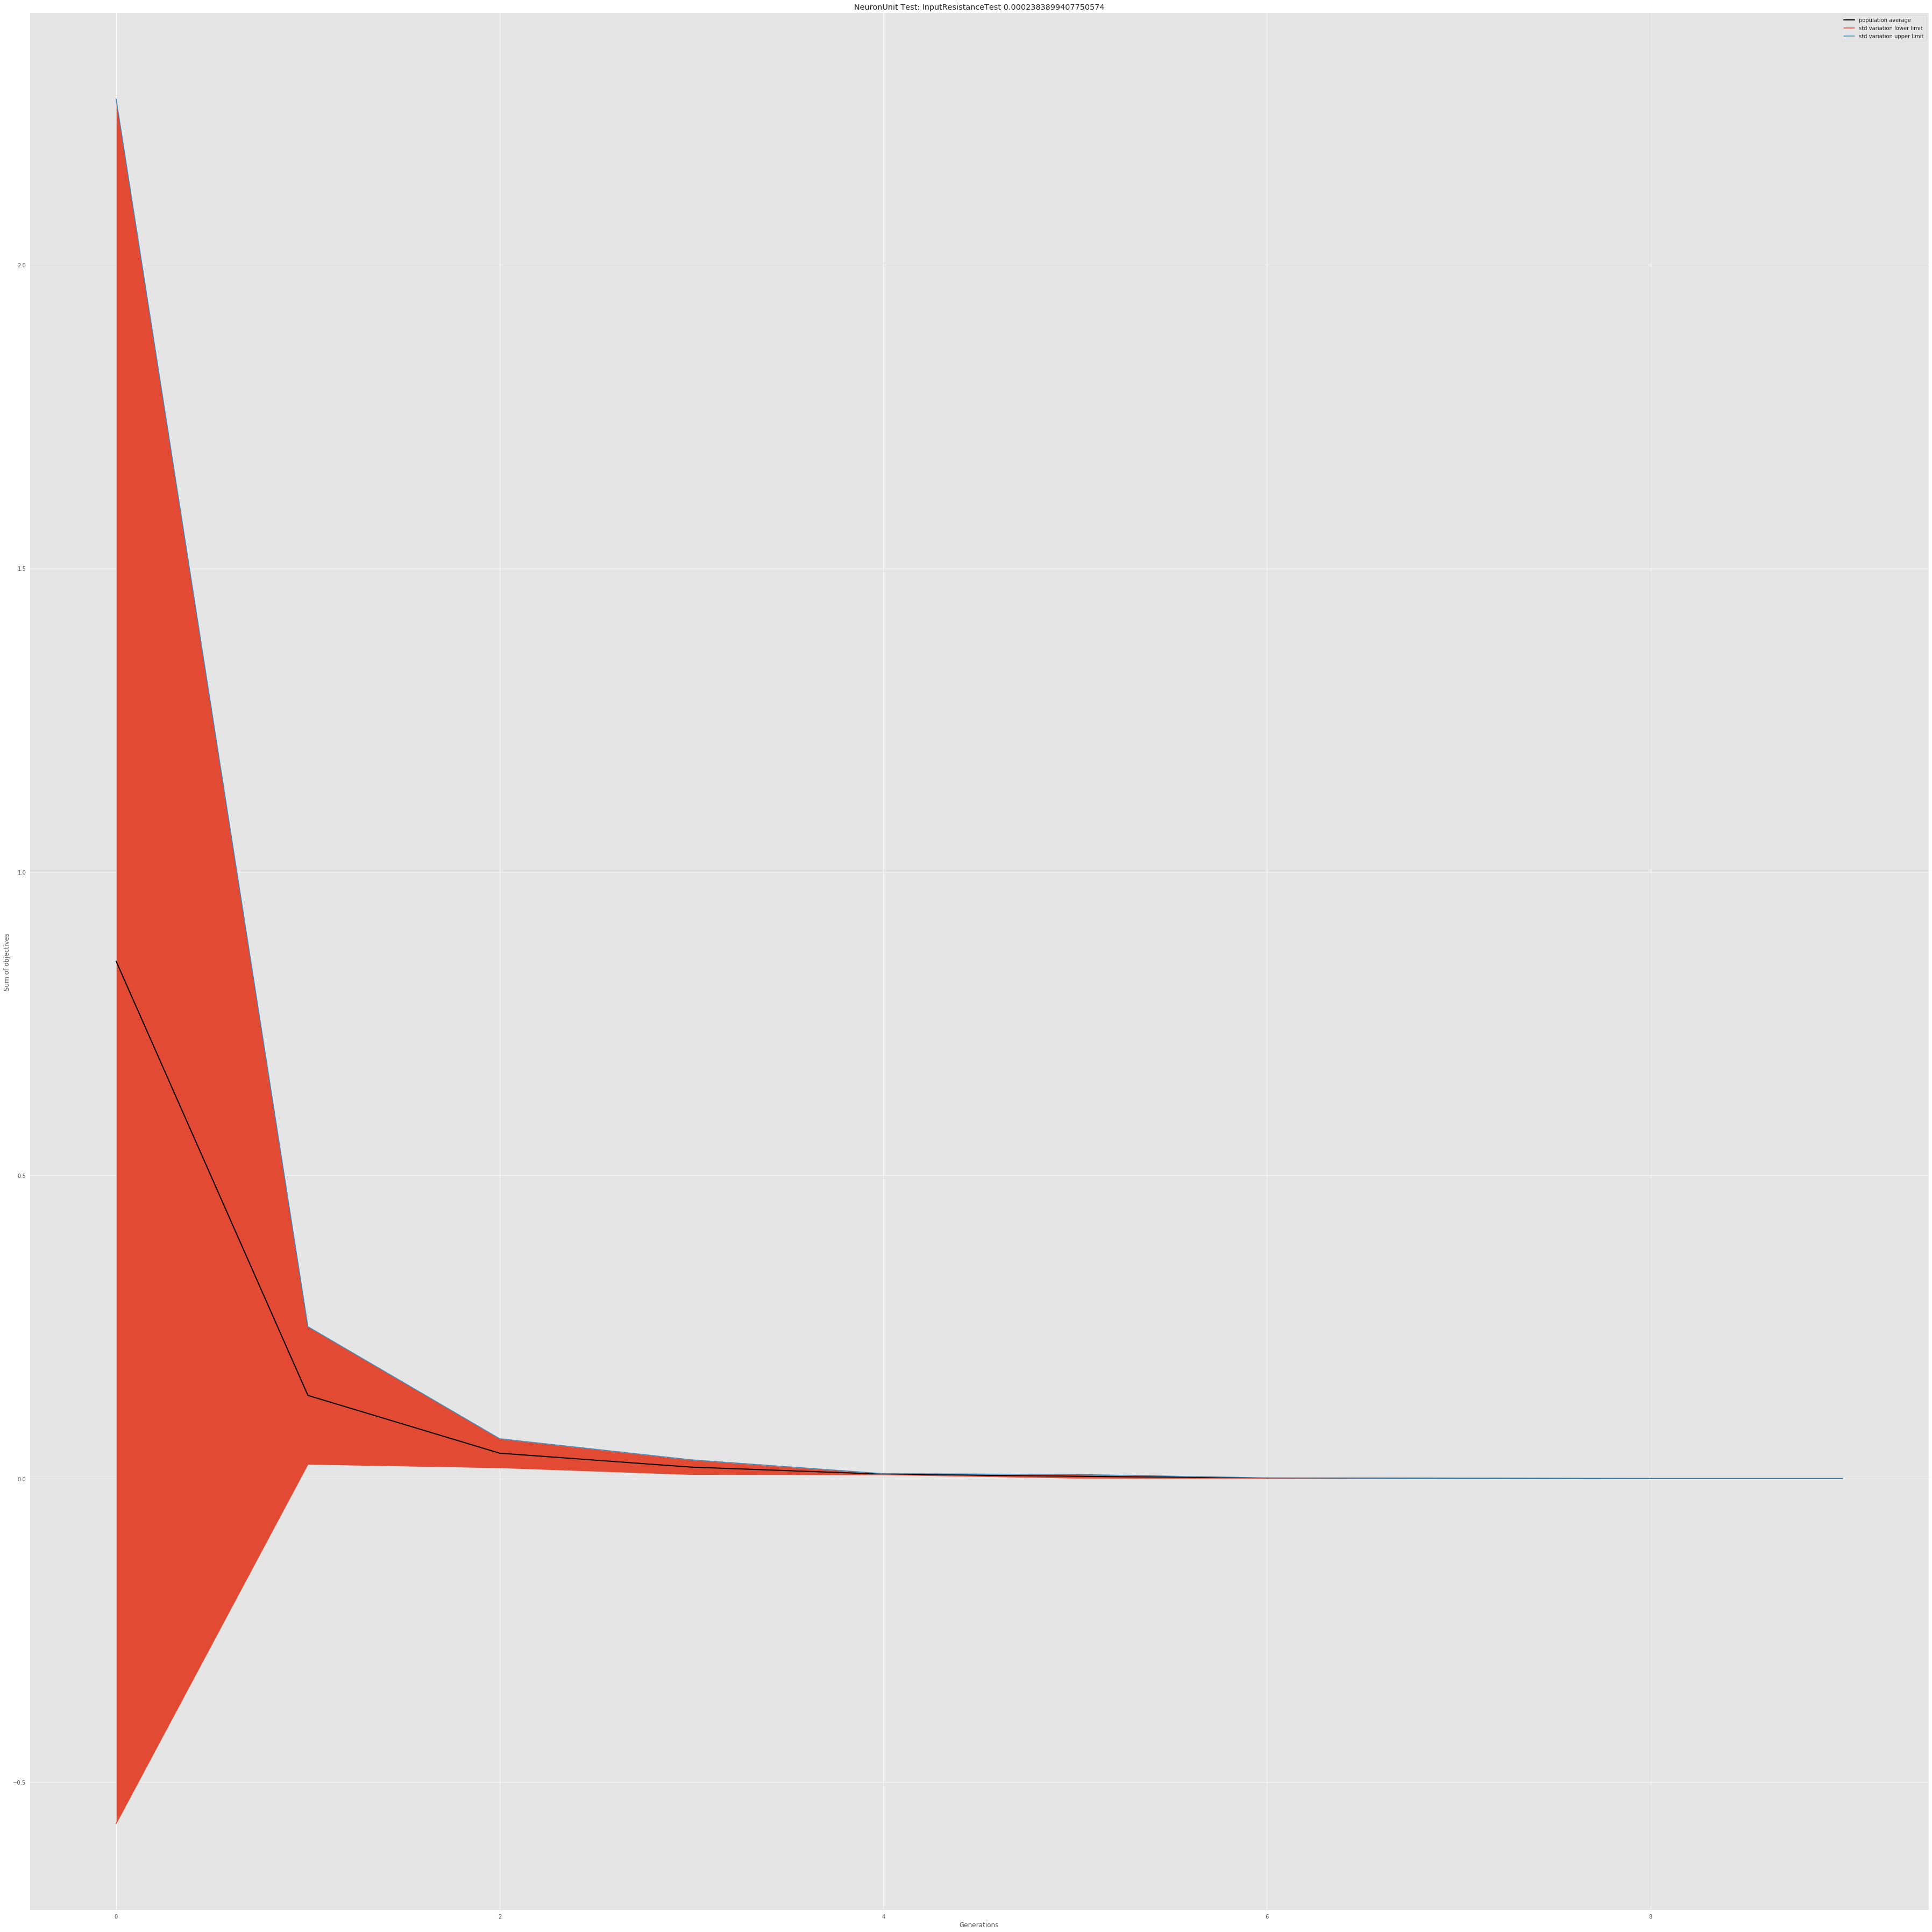

<Figure size 3600x3600 with 0 Axes>

<Figure size 432x288 with 0 Axes>

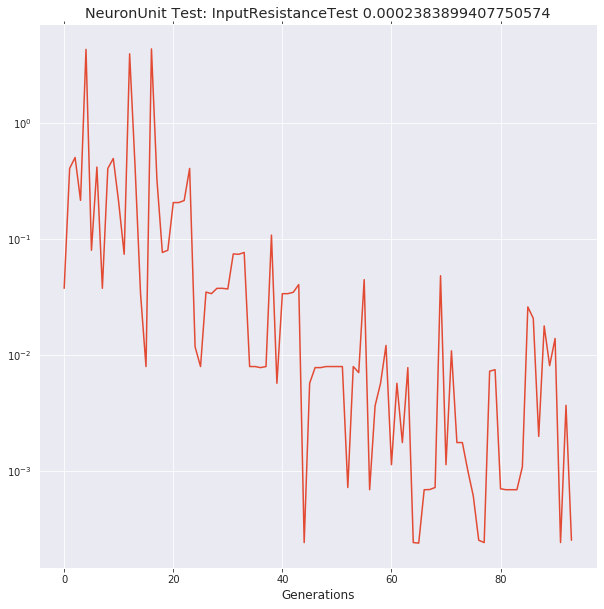

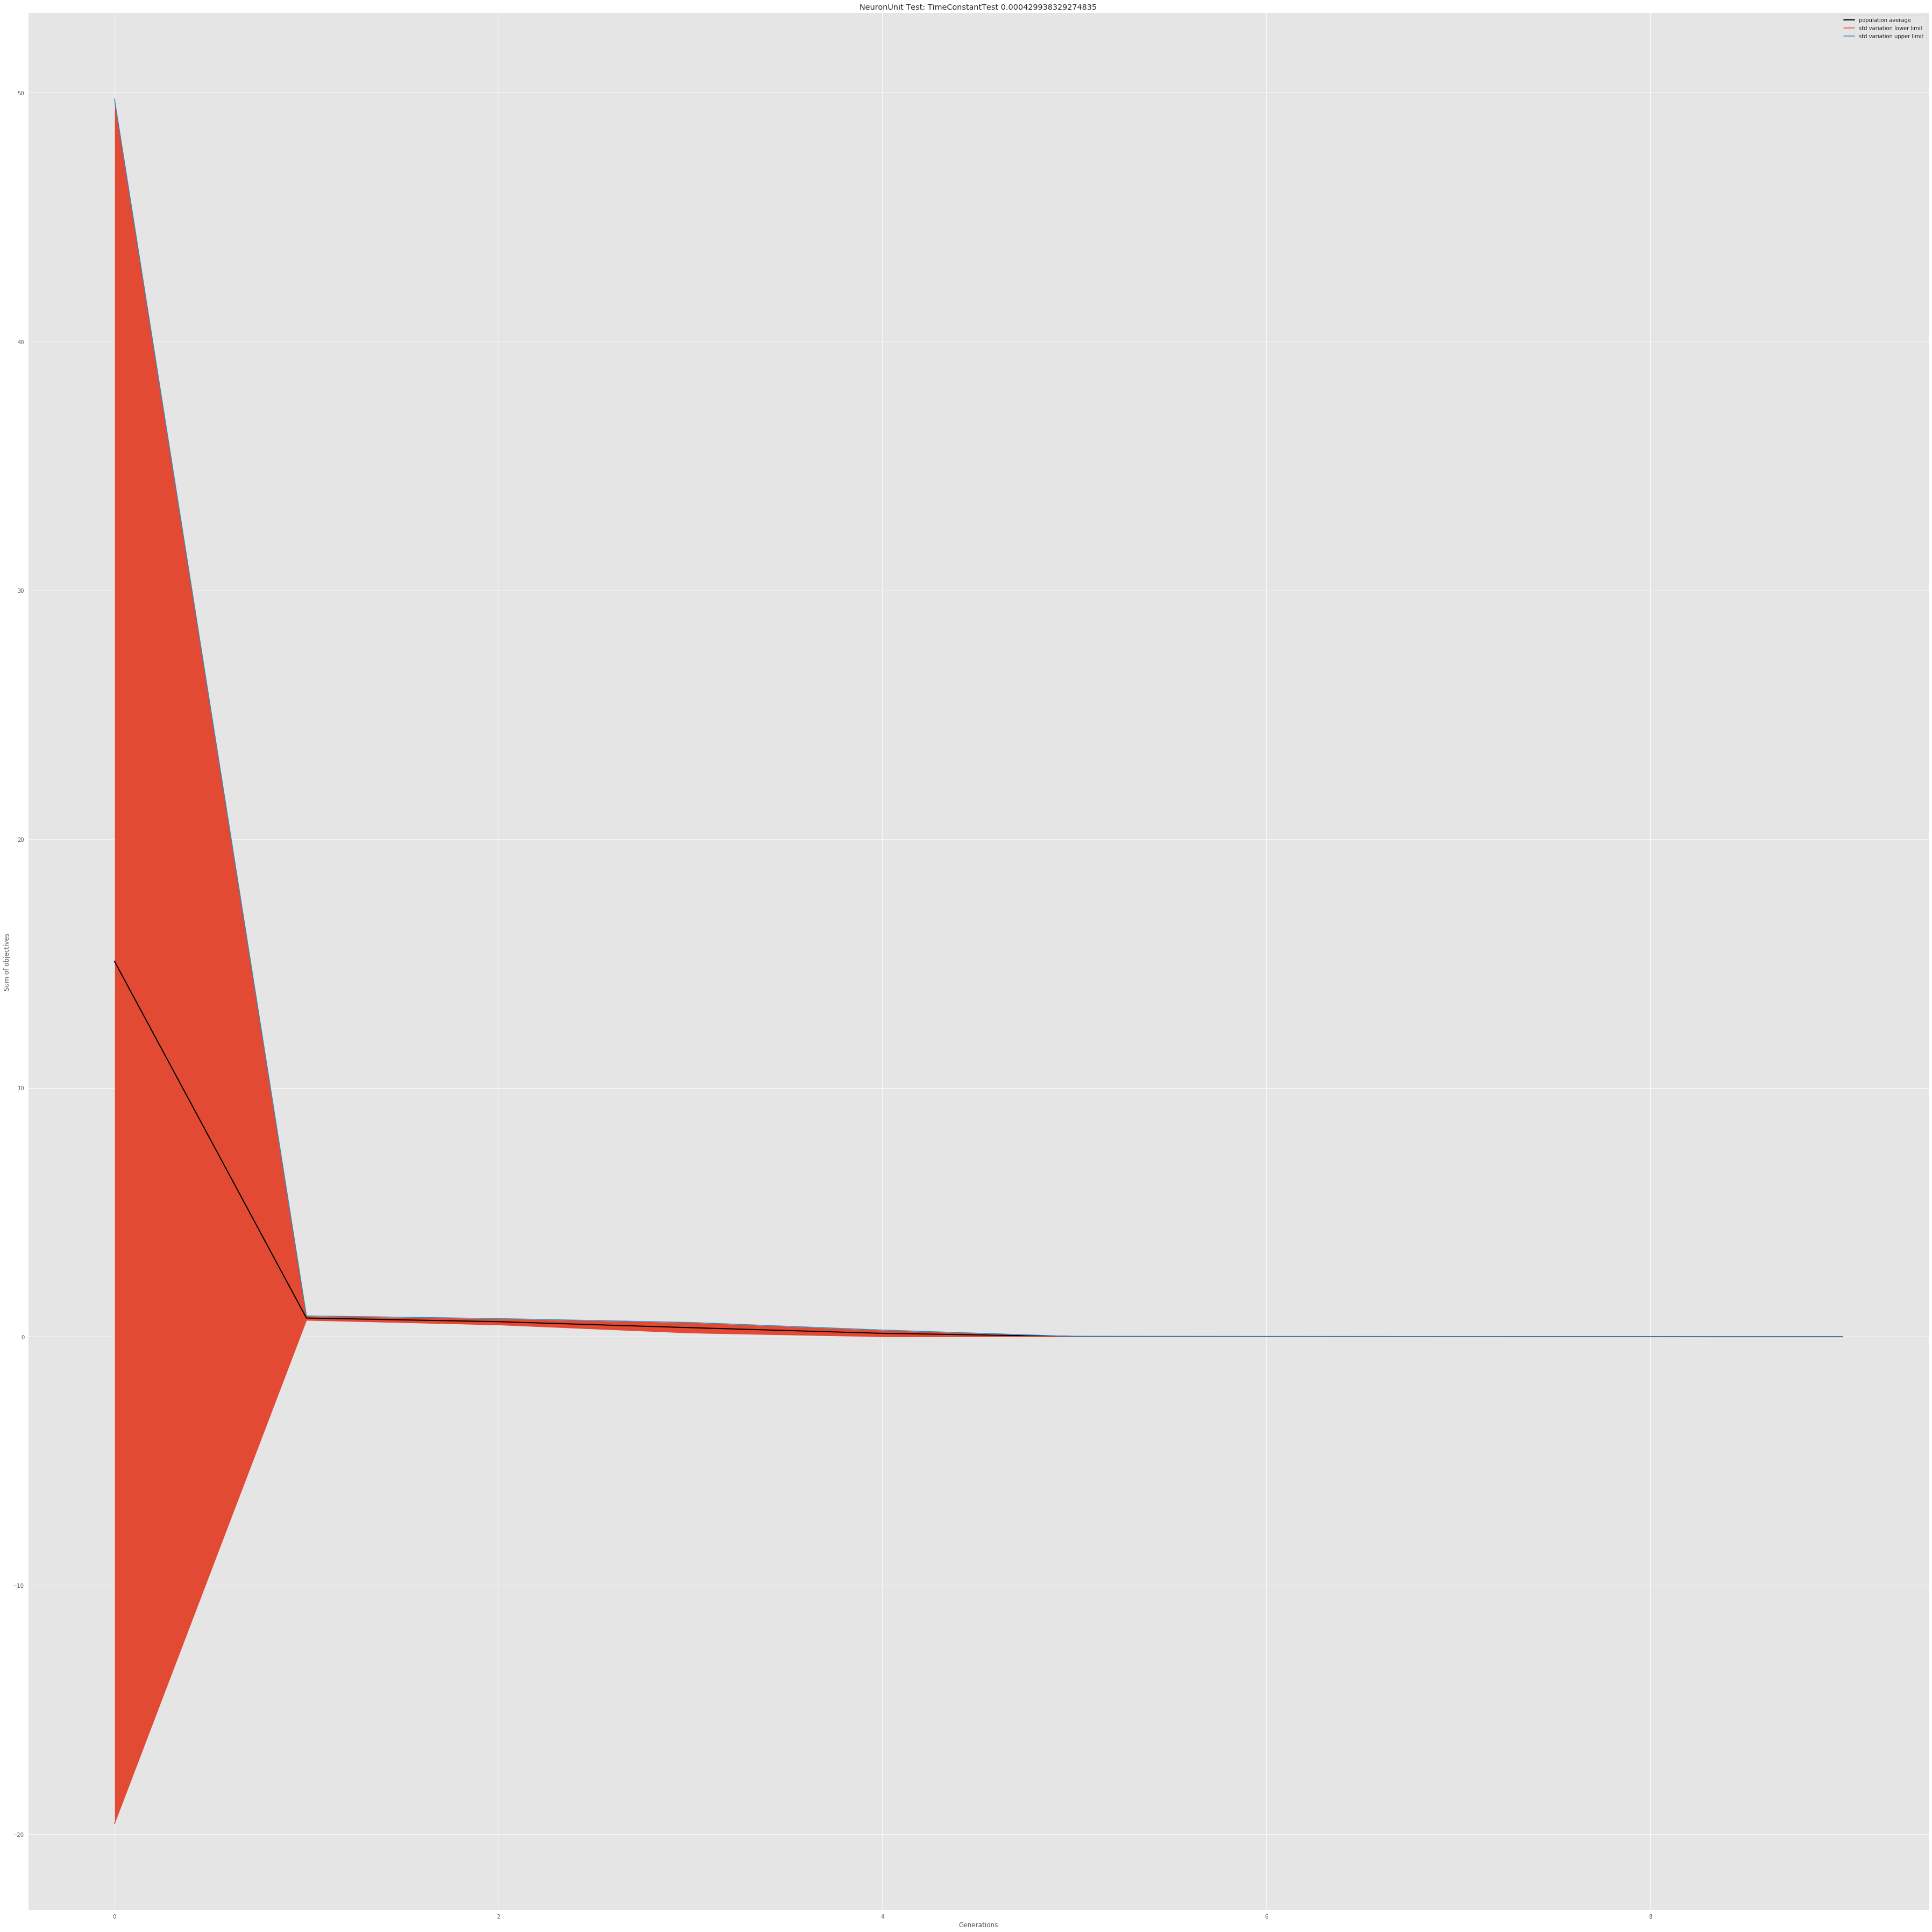

<Figure size 3600x3600 with 0 Axes>

<Figure size 432x288 with 0 Axes>

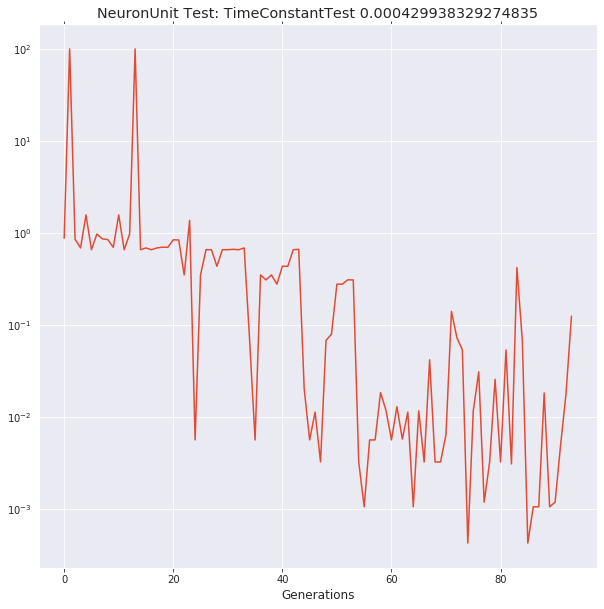

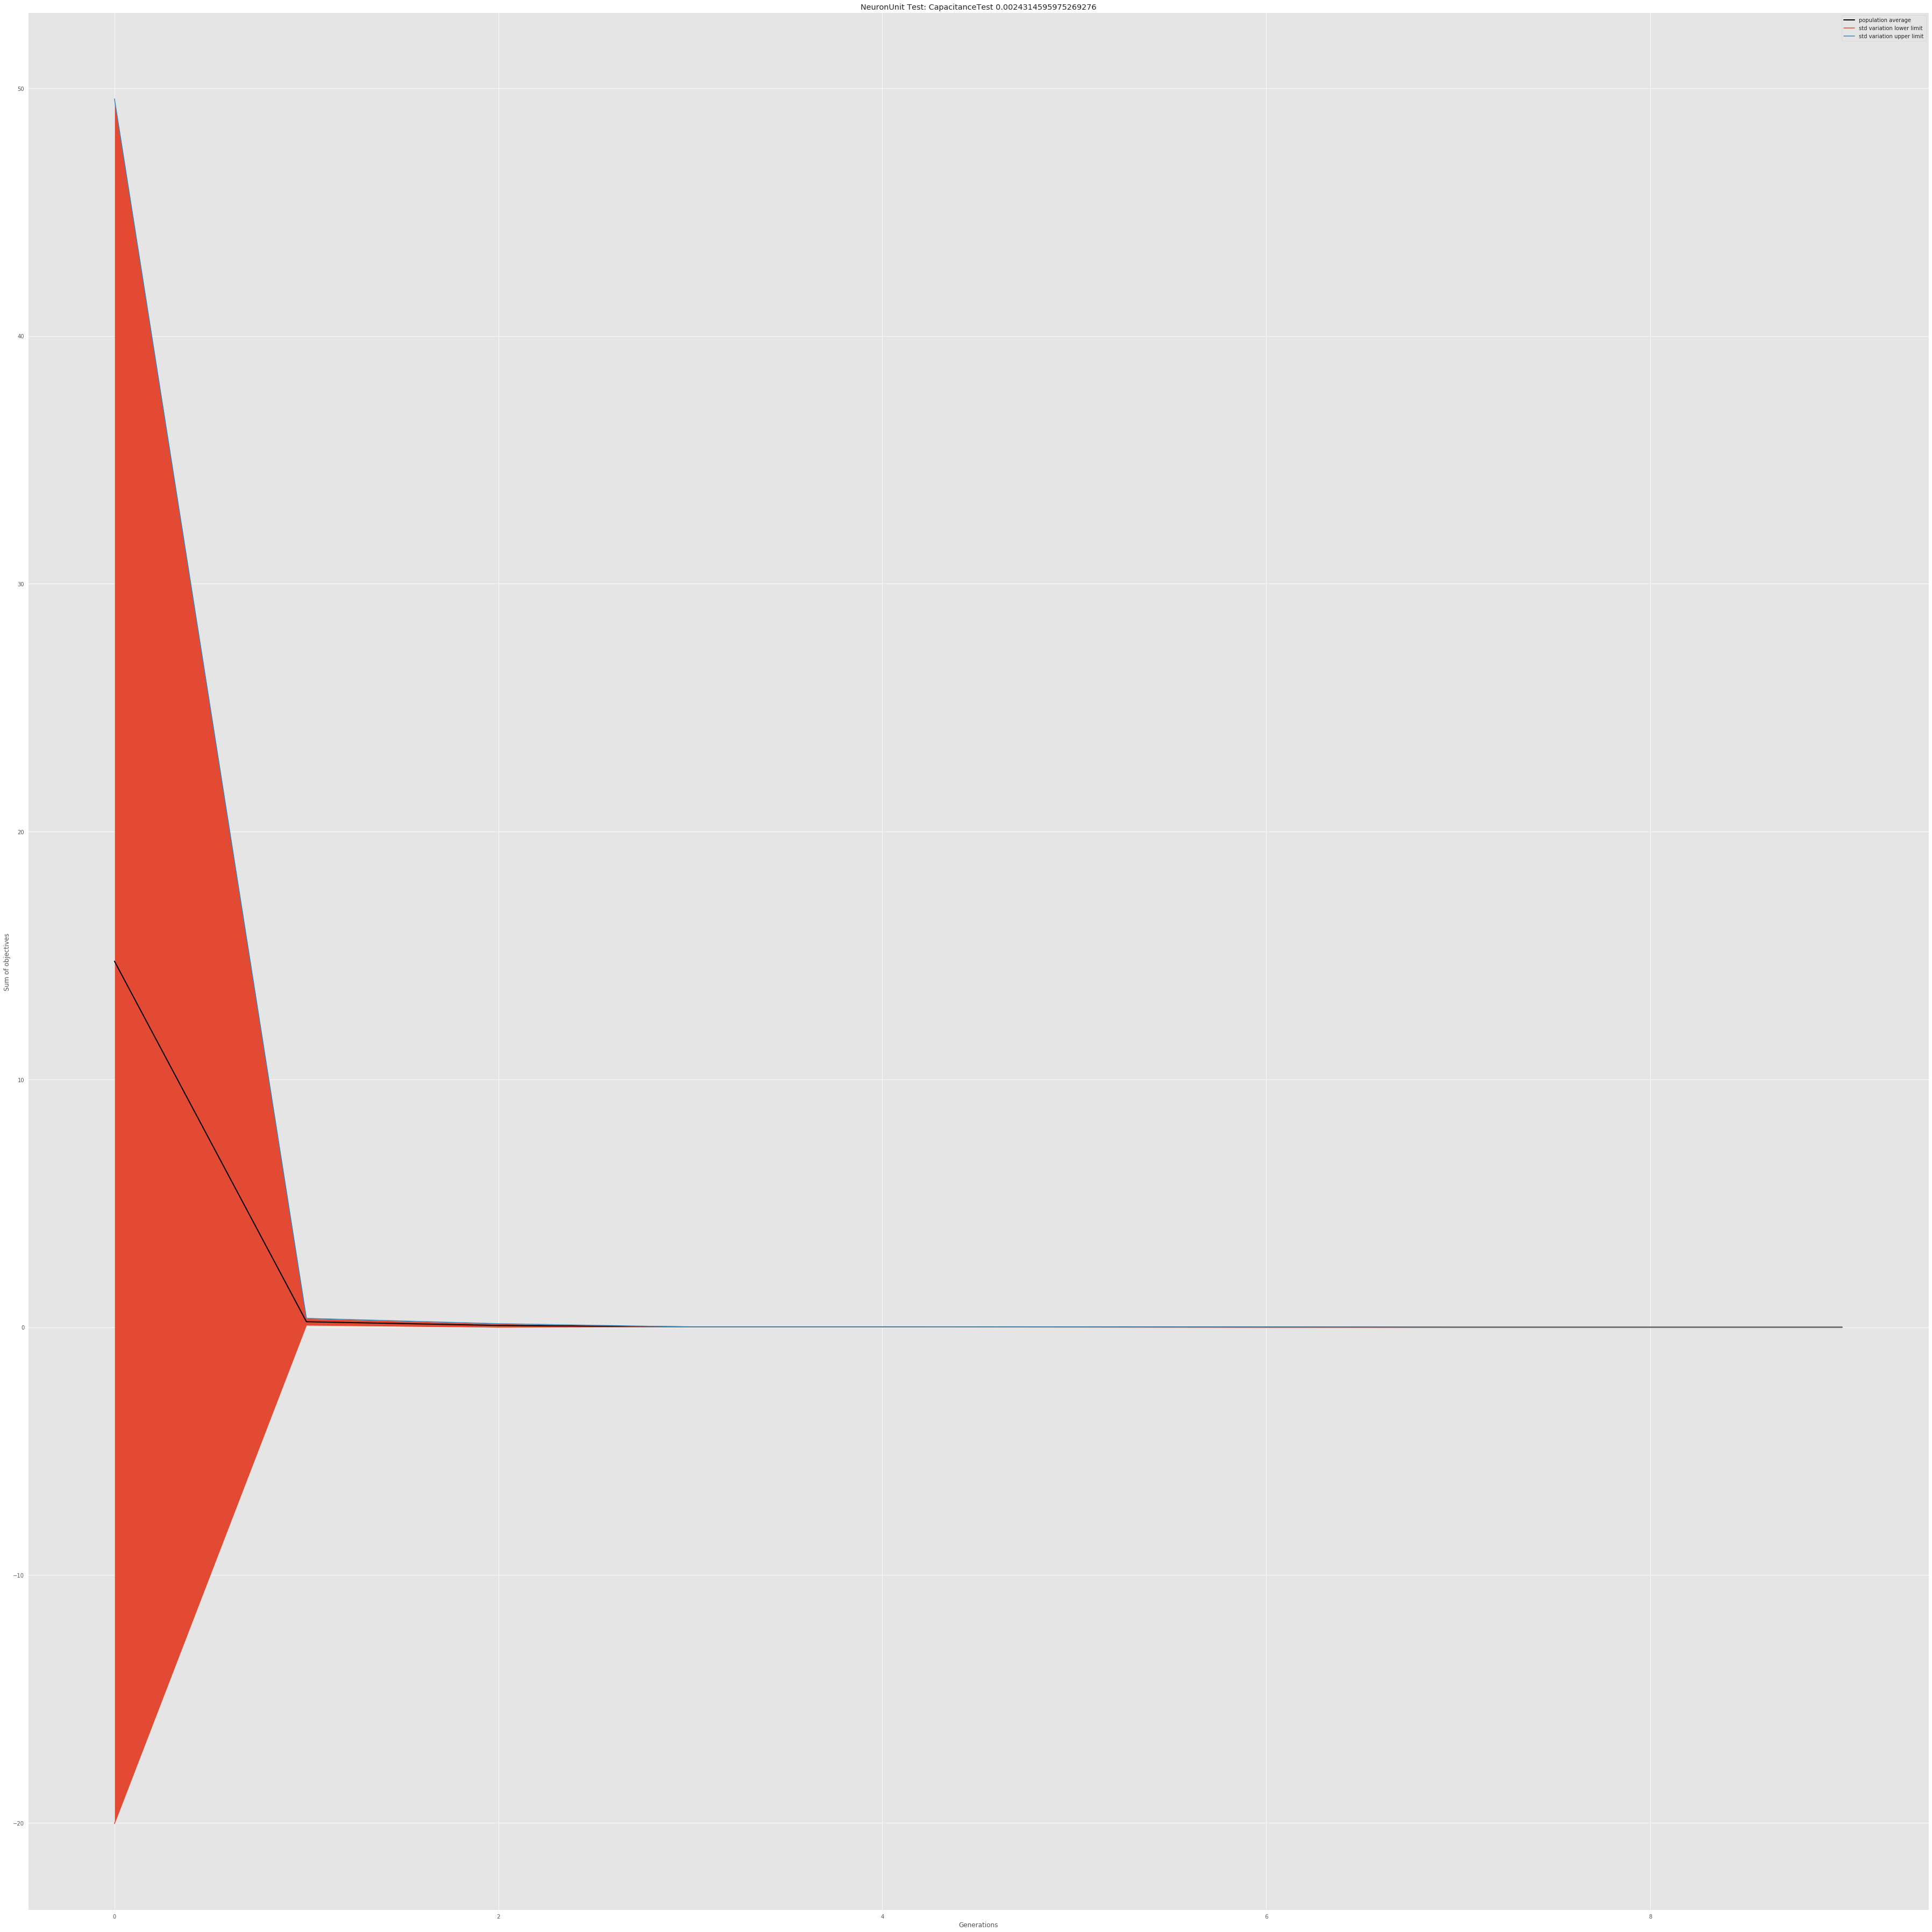

<Figure size 3600x3600 with 0 Axes>

<Figure size 432x288 with 0 Axes>

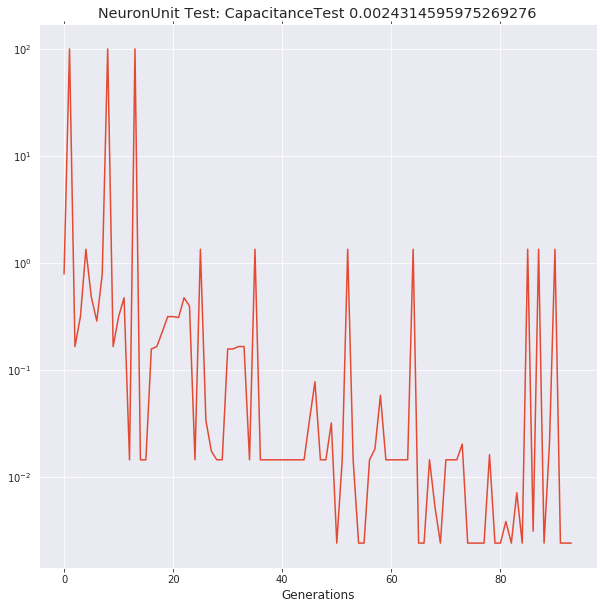

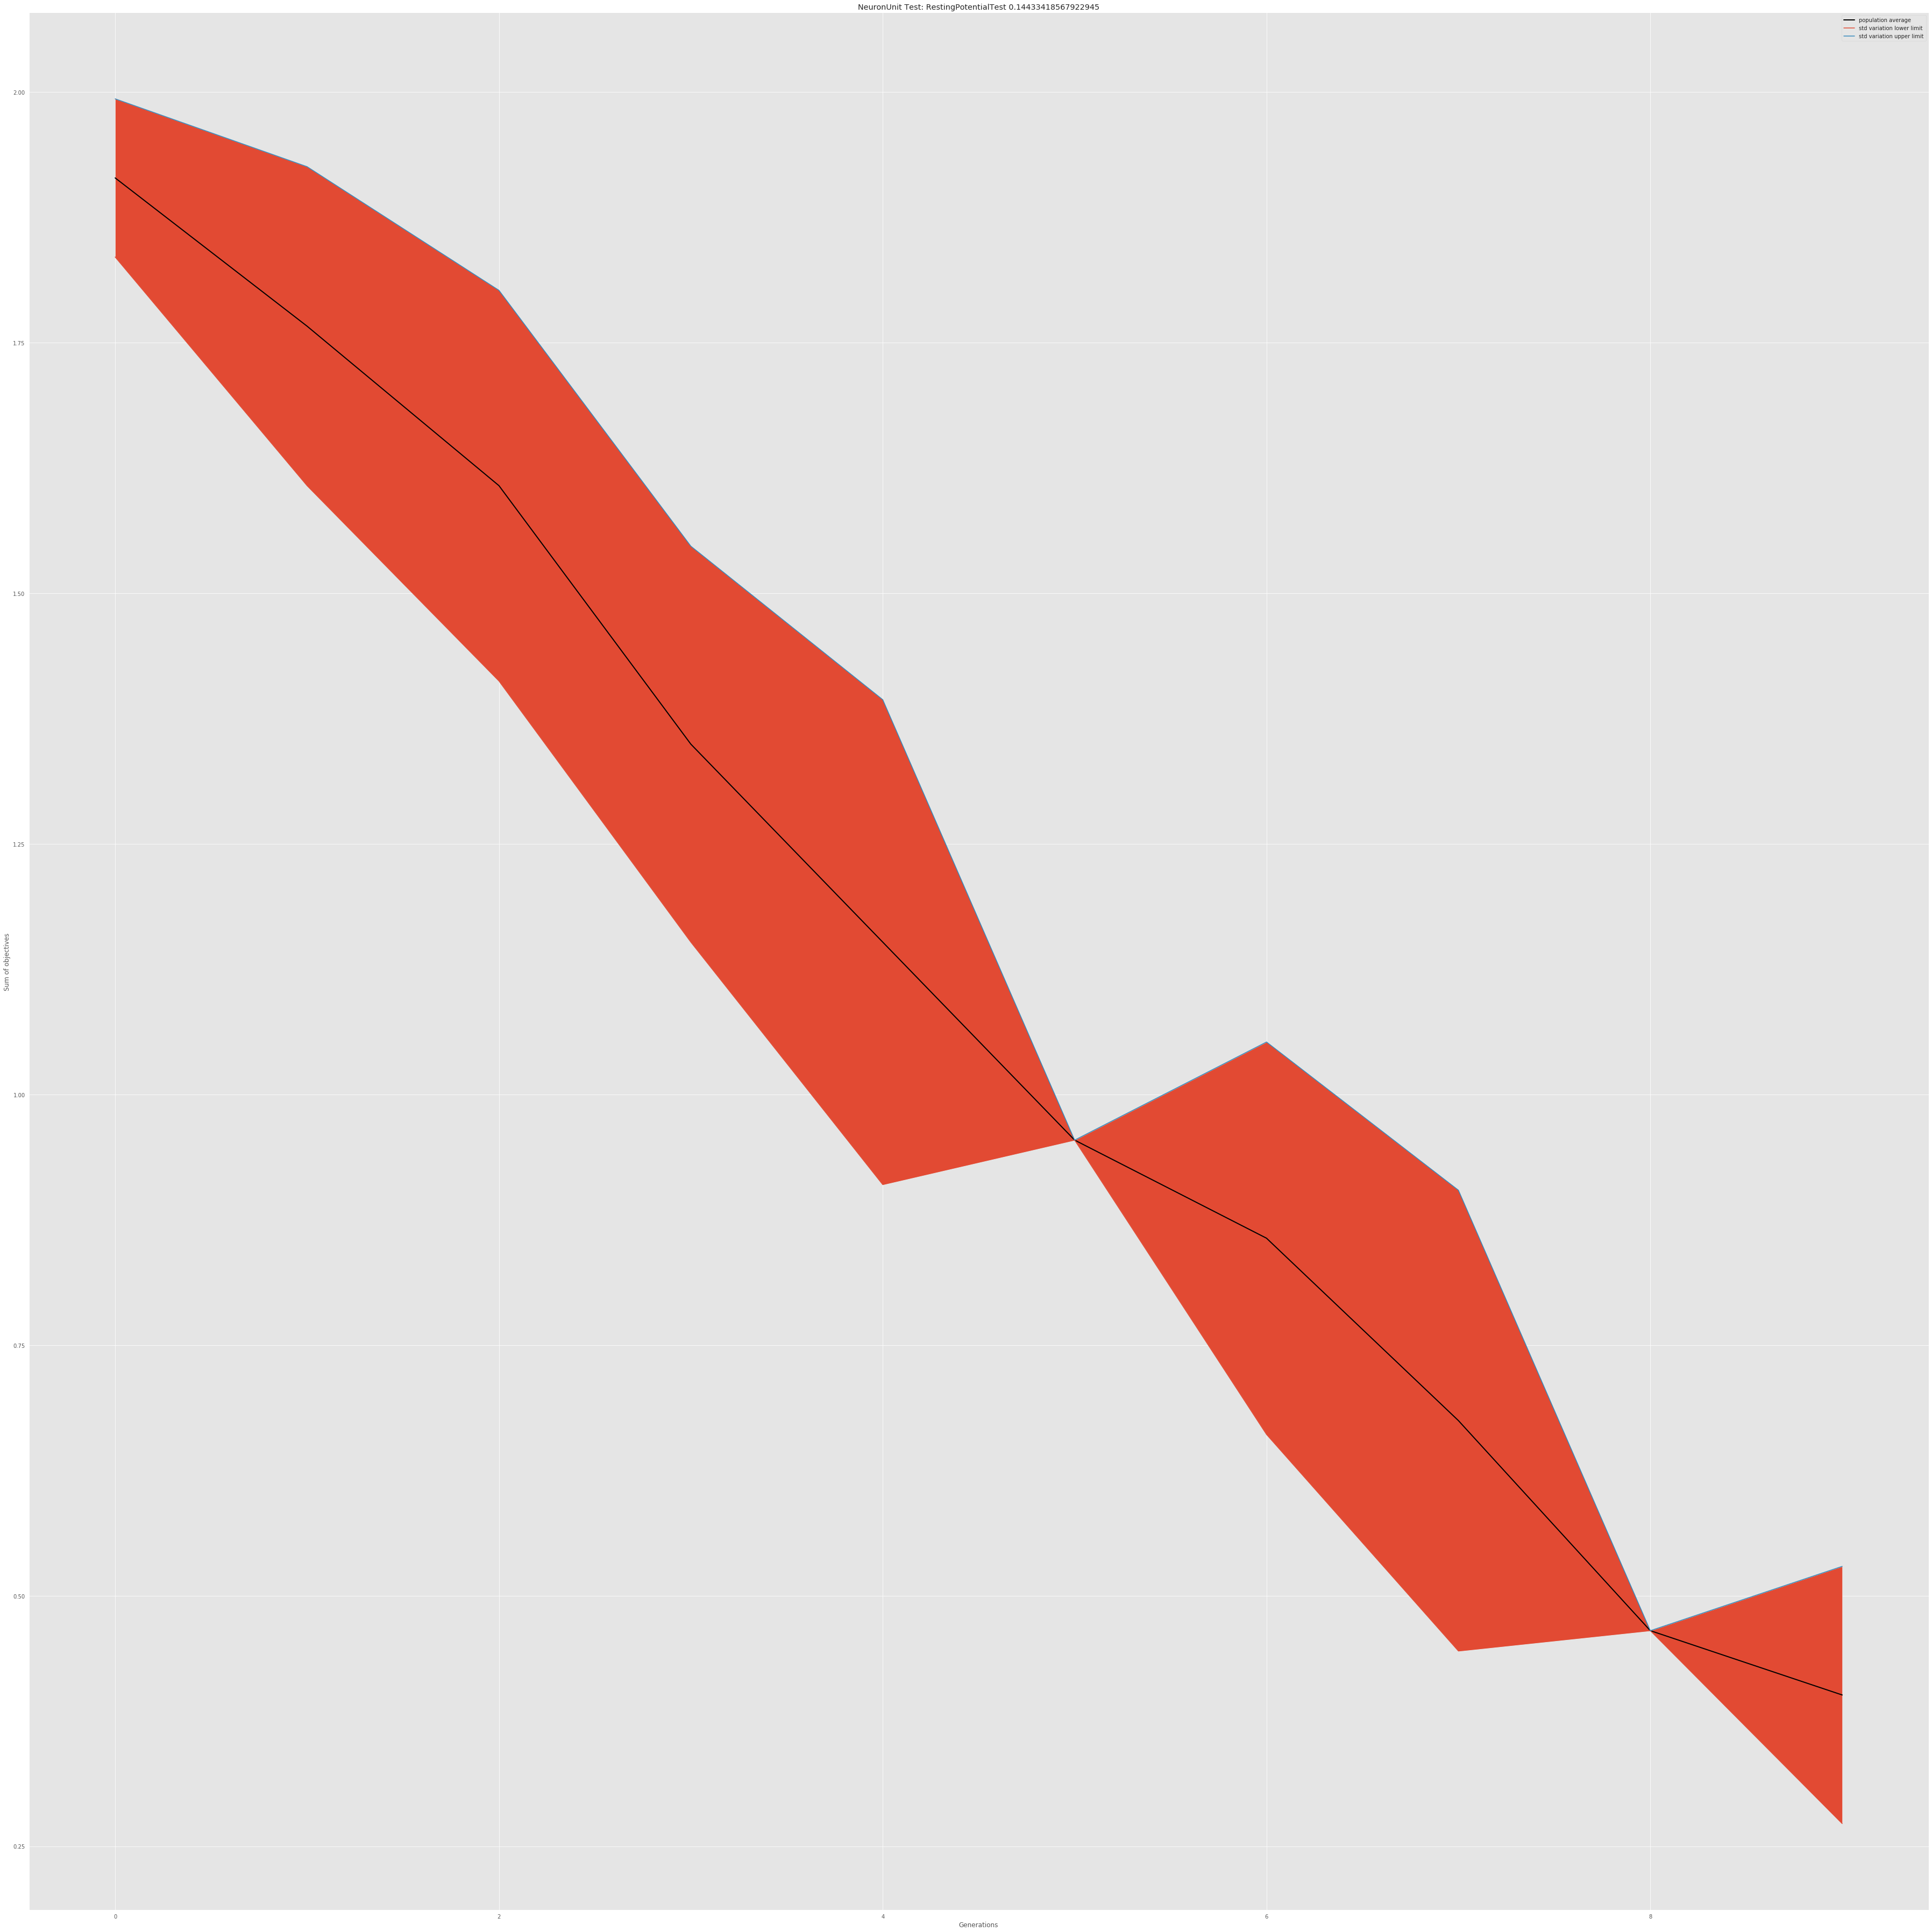

<Figure size 3600x3600 with 0 Axes>

<Figure size 432x288 with 0 Axes>

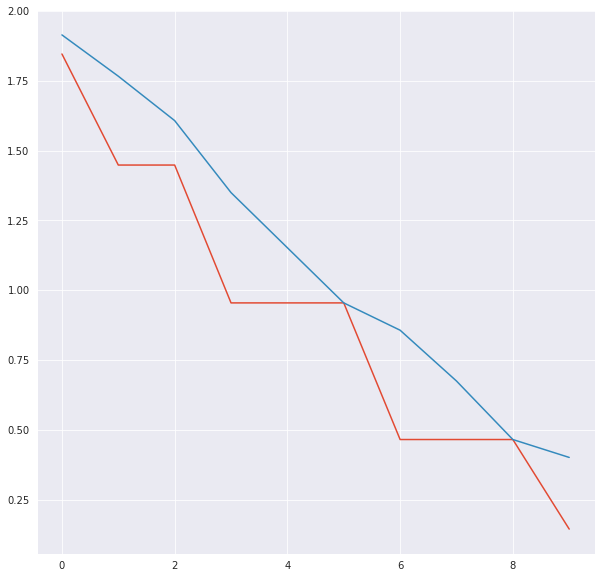

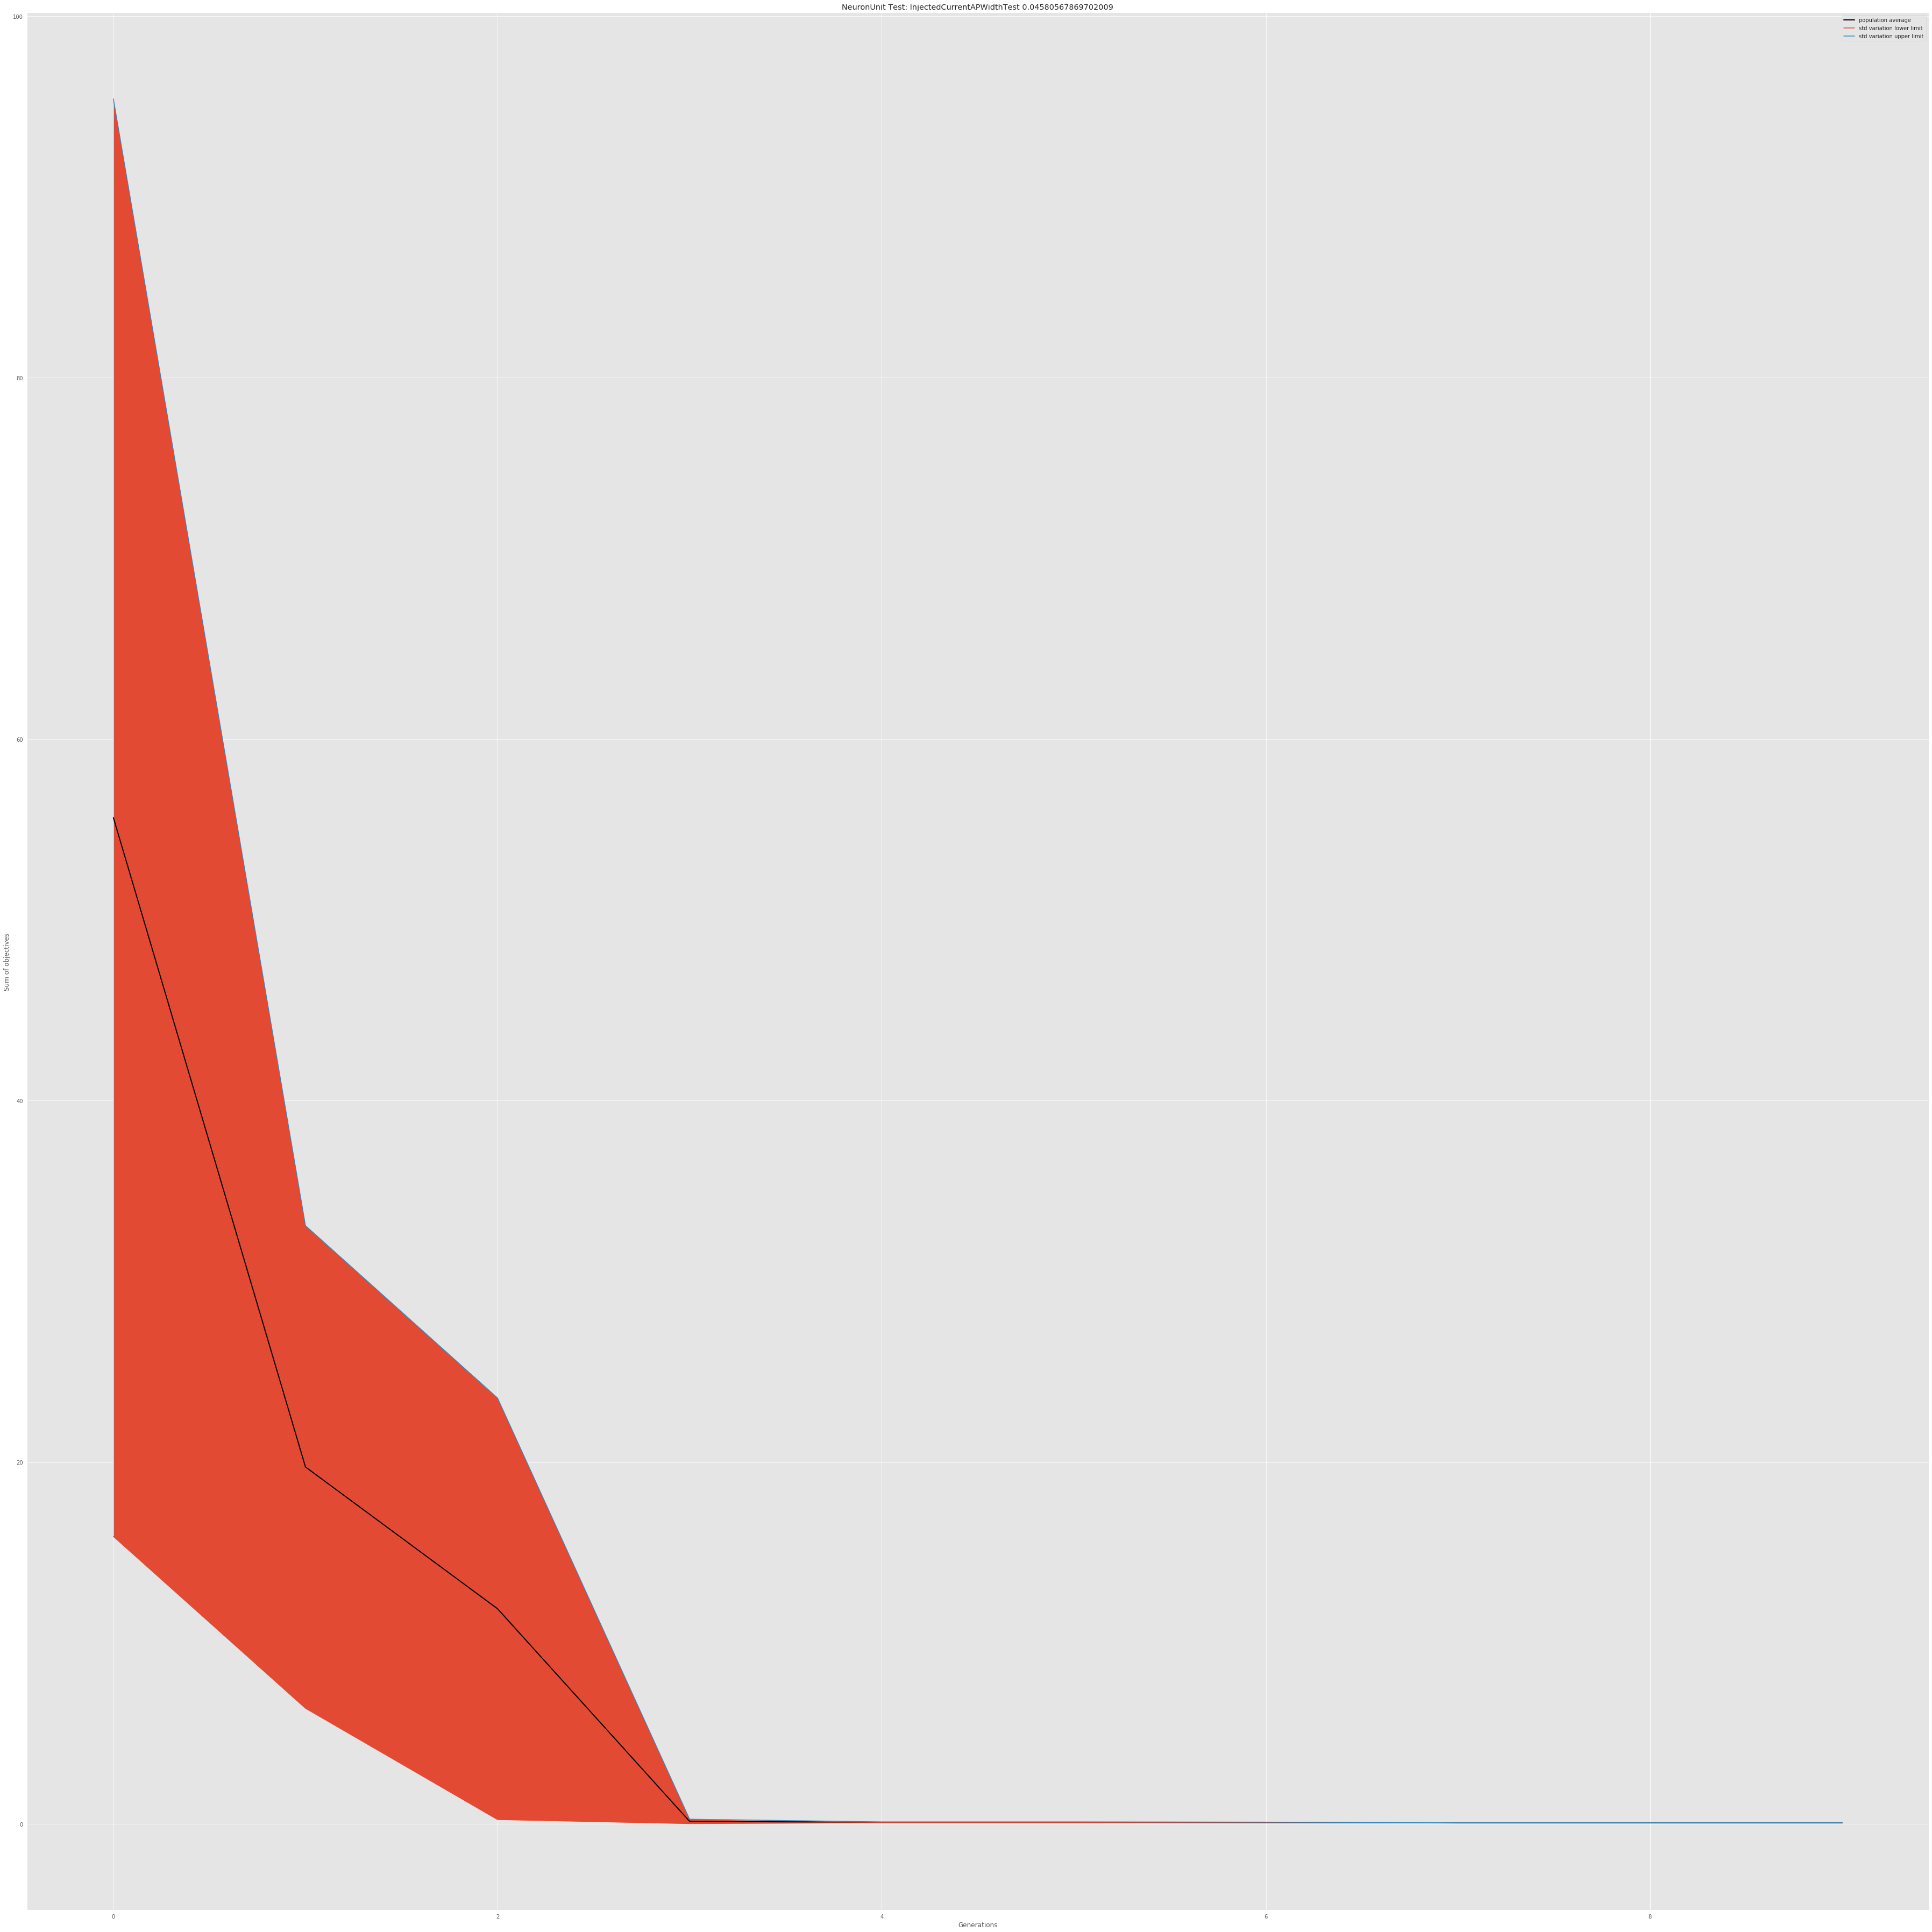

<Figure size 3600x3600 with 0 Axes>

<Figure size 432x288 with 0 Axes>

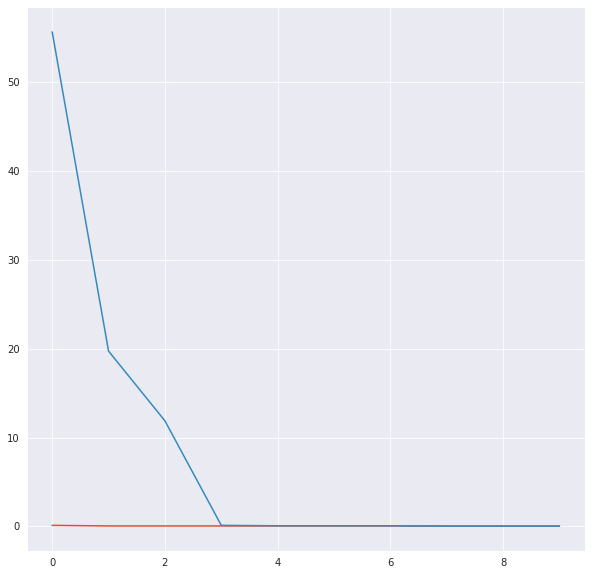

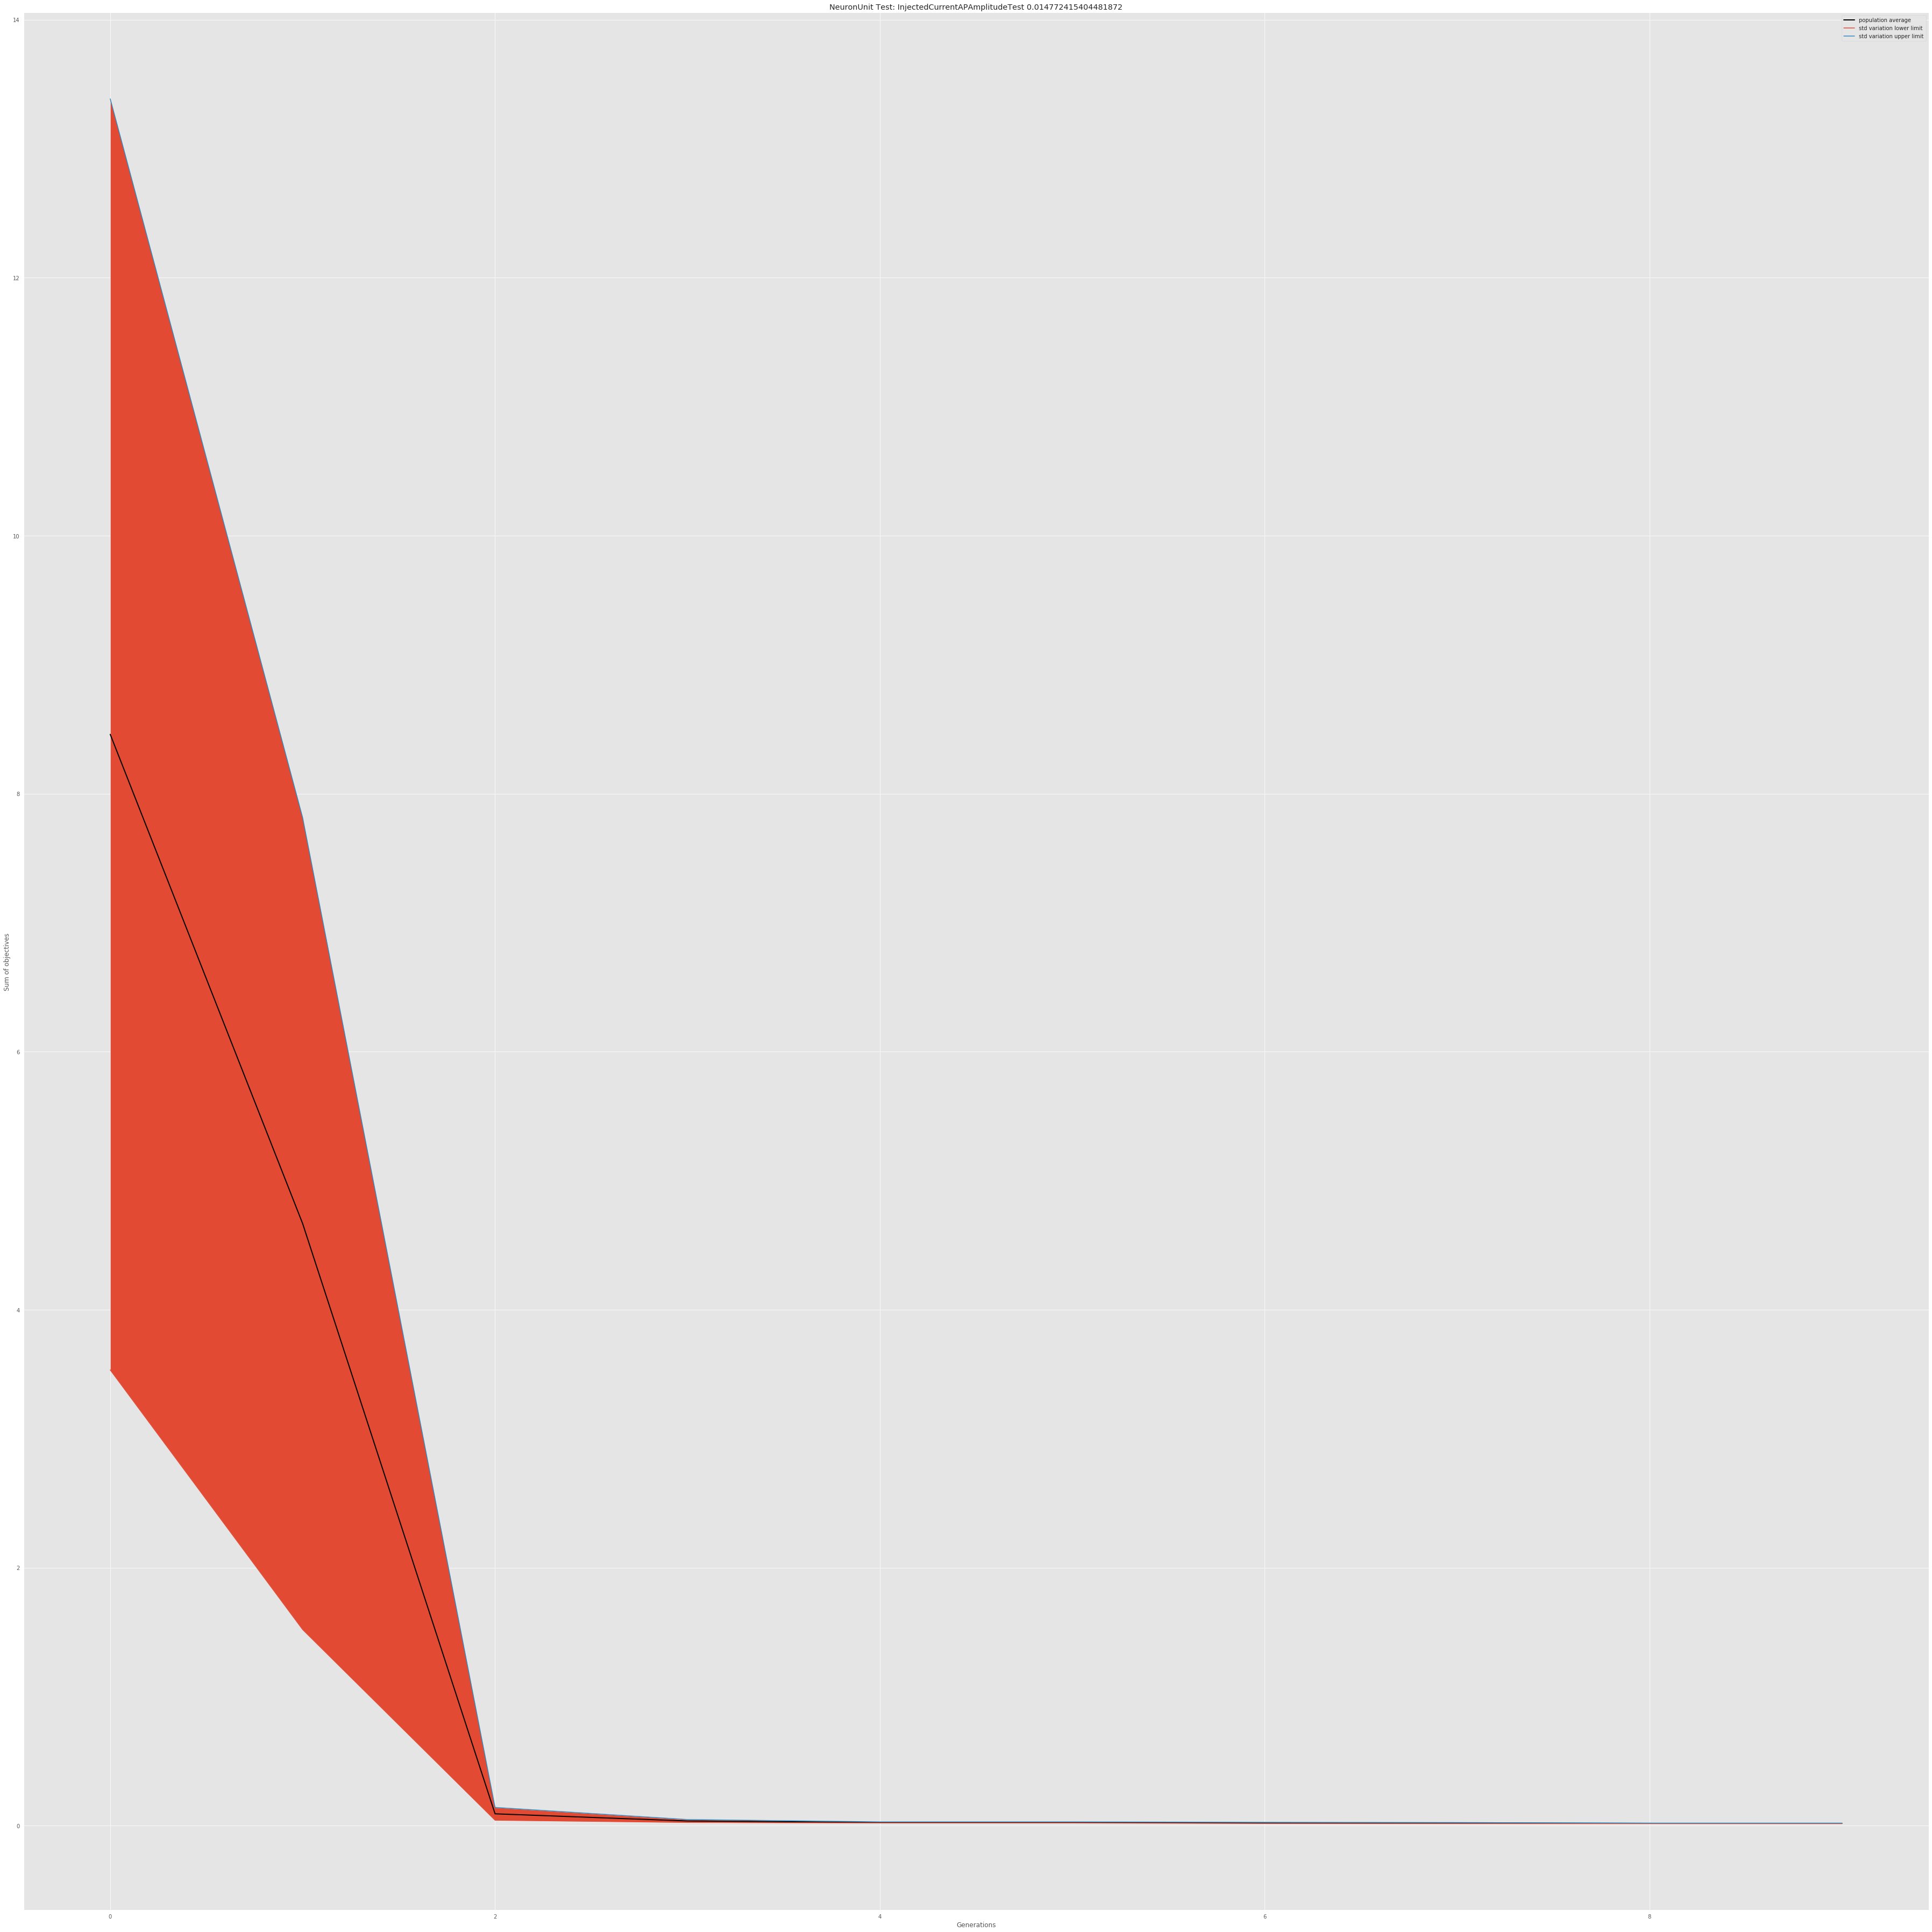

<Figure size 3600x3600 with 0 Axes>

<Figure size 432x288 with 0 Axes>

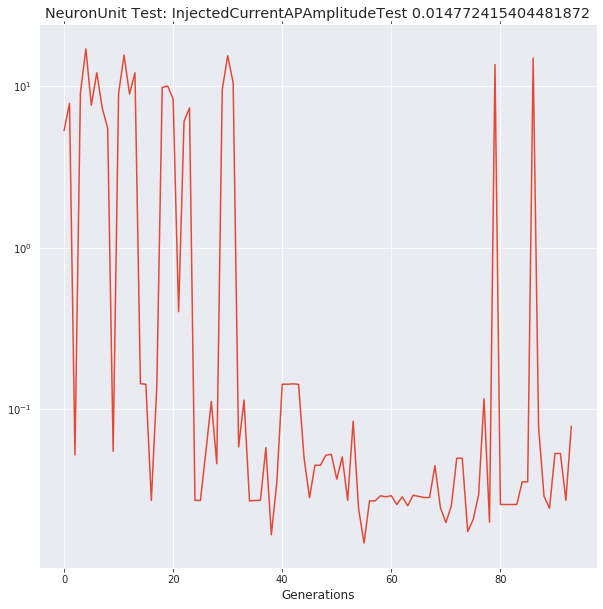

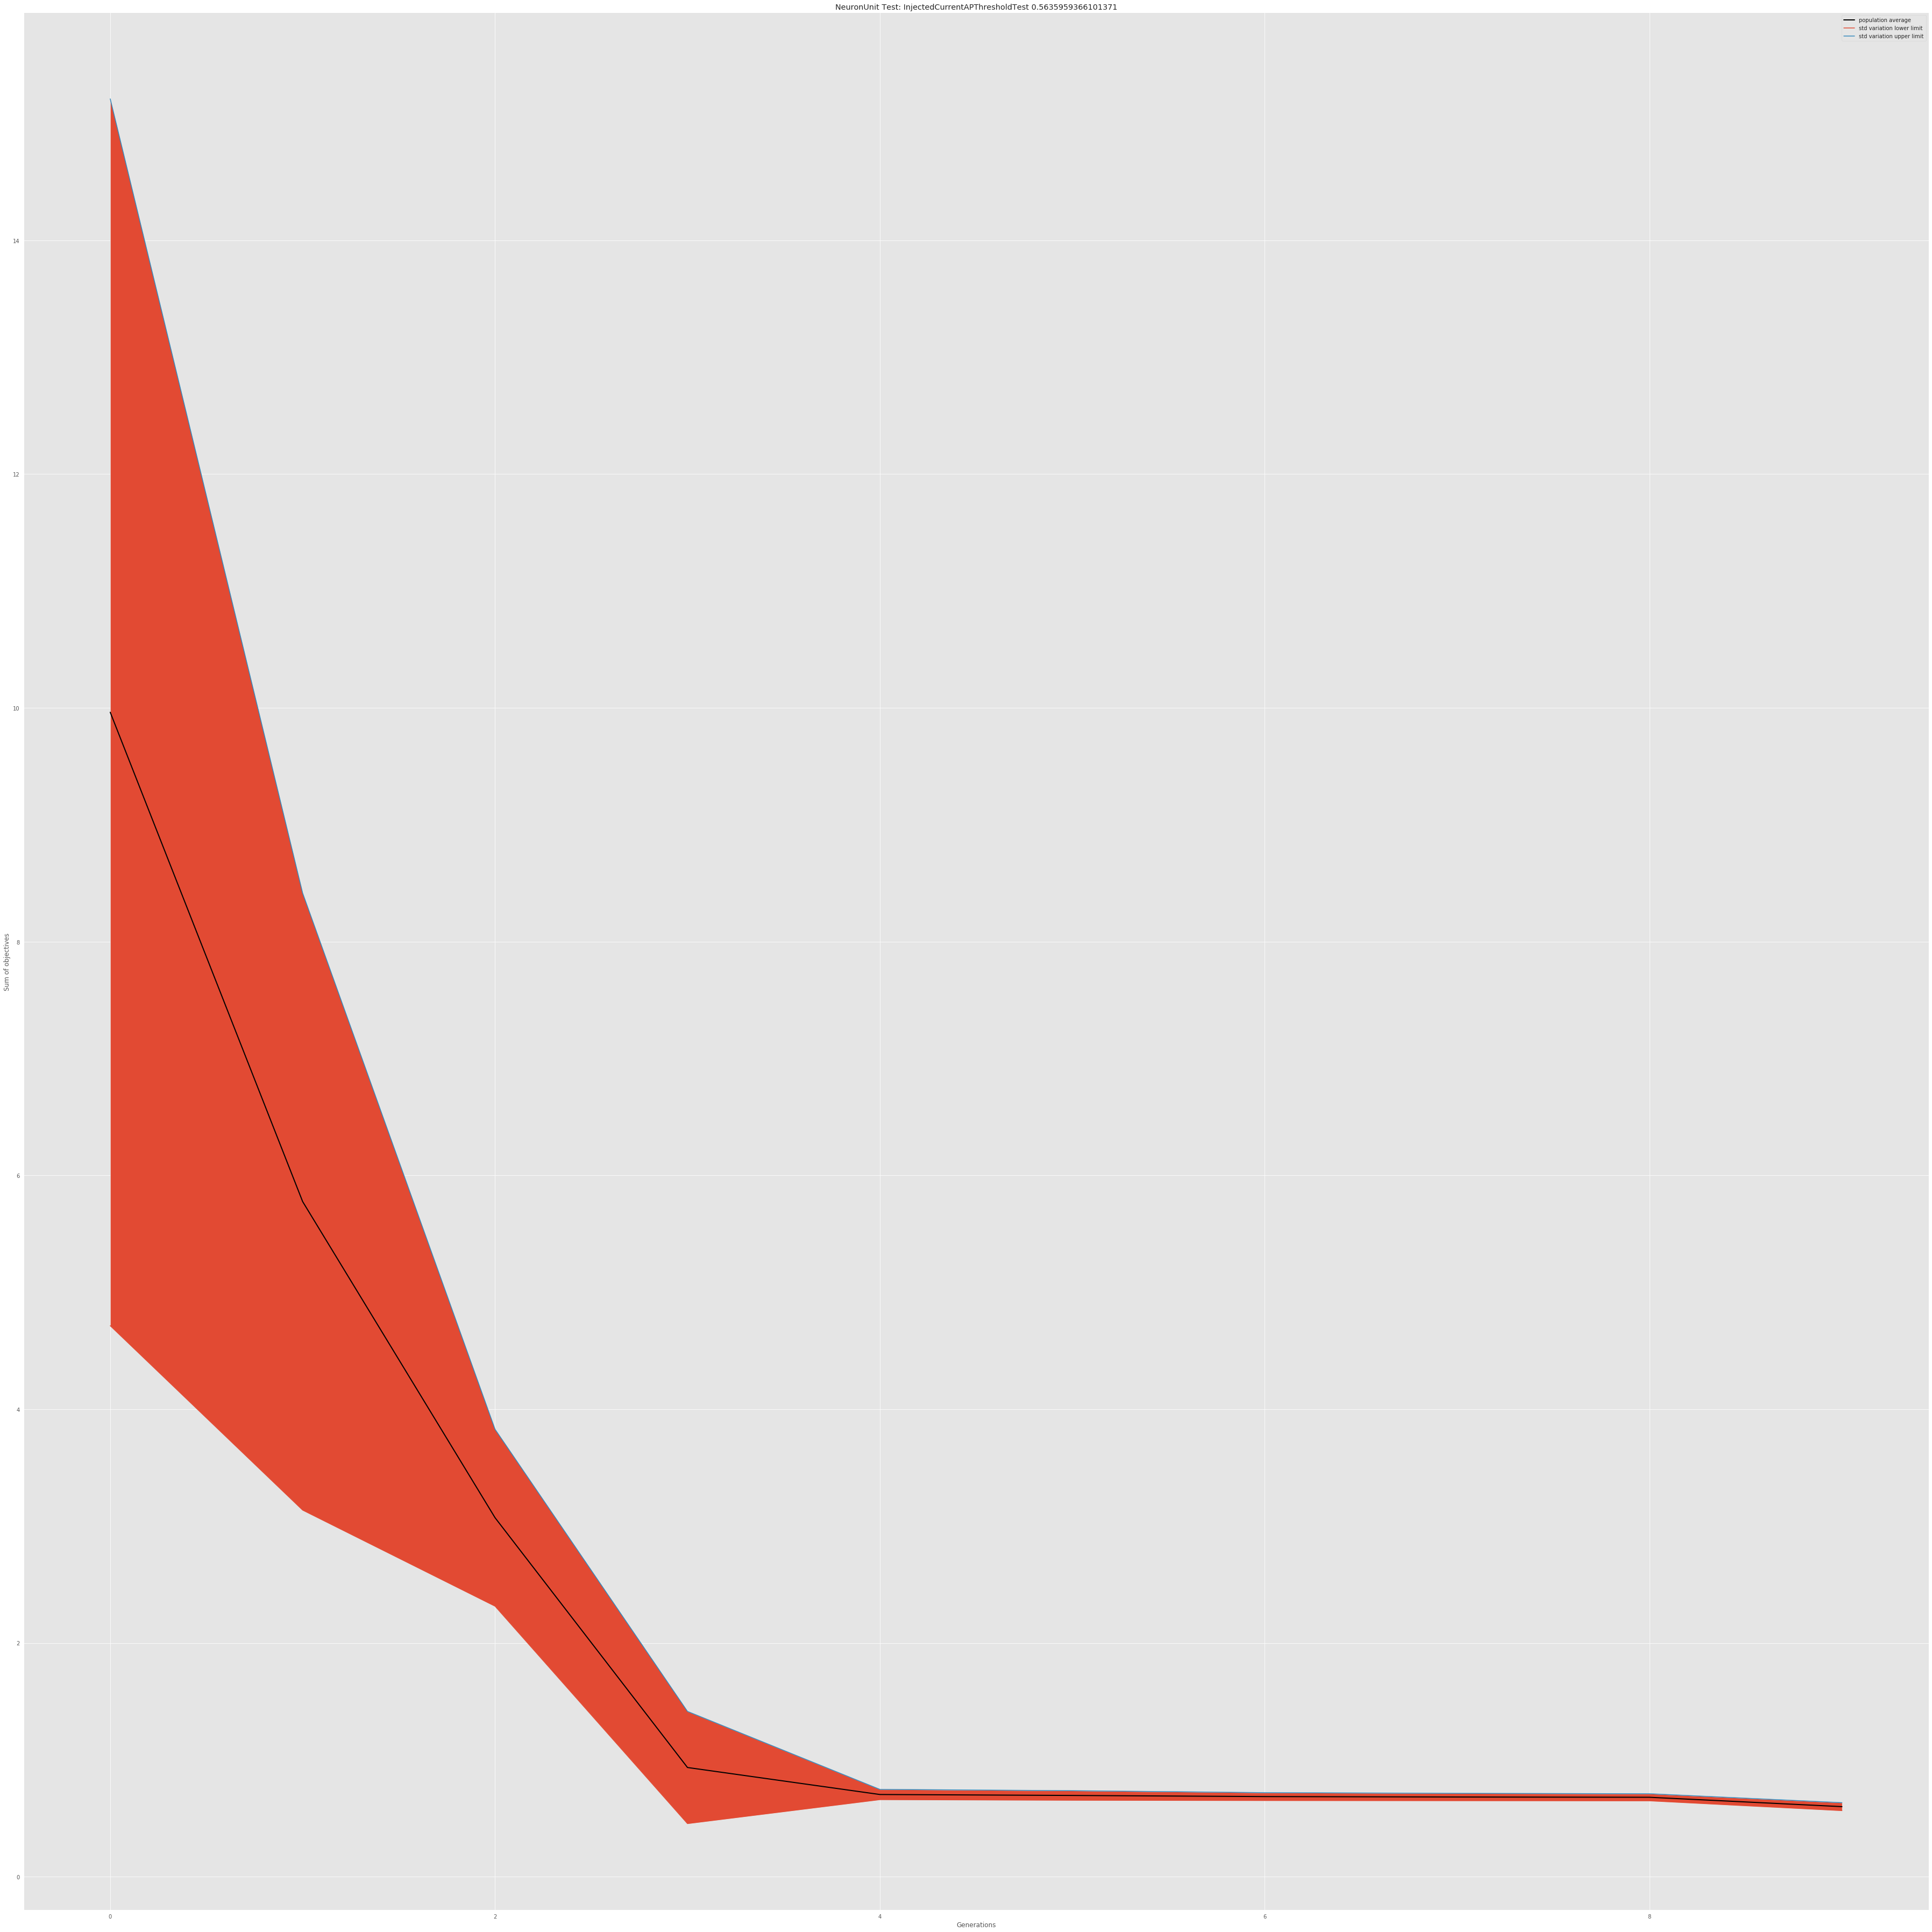

<Figure size 3600x3600 with 0 Axes>

<Figure size 432x288 with 0 Axes>

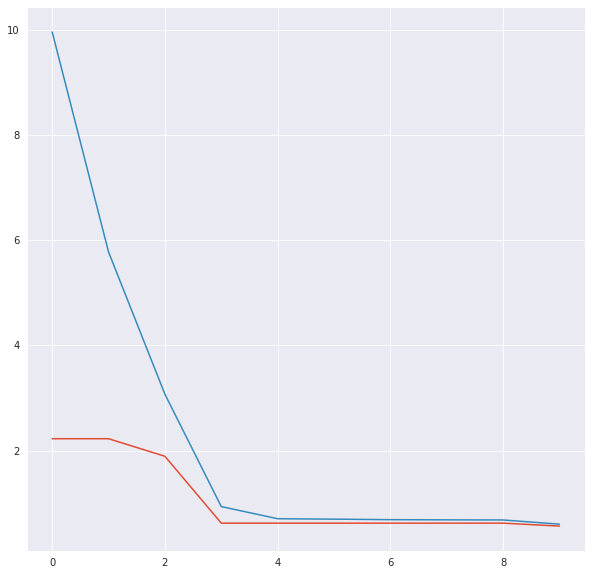

In [11]:
#class TestSum(unittest.TestCase):
results = {}
tests = {}
ut = unittest.TestCase()
#front = None
for k in simulated_data_tests.keys():
    tests[k] = hide_imports.TSD([simulated_data_tests[k]])
    #if front is None:
    results[k] = tests[k].optimize(OM.boundary_dict,backend=OM.backend,\
            protocol={'allen': False, 'elephant': True},\
                MU=10,NGEN=10,plot=True)
    opt = results[k]['pf'][0].dtc
    front = results[k]['pf']
    display(opt.obs_preds)
    try:
        ut.assertLess(opt.obs_preds['total']['scores'],0.015)
    except:
        y1 = [i['avg'][0] for i in results[k]['log']]
        y = [i['min'][0] for i in results[k]['log']]
        x = [i['gen'] for i in results[k]['log']]

        gradient = linregress(x, y)
        ut.assertLess(gradient[0],-0.0010465789127244809)
        gradient = linregress(x, y1)
        ut.assertLess(gradient[0],-0.0010465789127244809)
        #-0.002313347013883637 
        plt.clf()
        plt.plot(x,y)
        plt.plot(x,y1)
        plt.show()

(5, 1)


,RheobaseTest,total
observations,72.7020263671875 pA,NaN
predictions,74.85122680664062 pA,NaN
scores,0.010111,0.010111


(5, 1)


,InputResistanceTest,total
observations,58628137.94655039 kg*m**2/(s**3*A**2),NaN
predictions,62142443.453609526 kg*m**2/(s**3*A**2),NaN
scores,0.0367743,0.036774


AssertionError: -0.00022199858276358774 not less than -0.005465789127244809

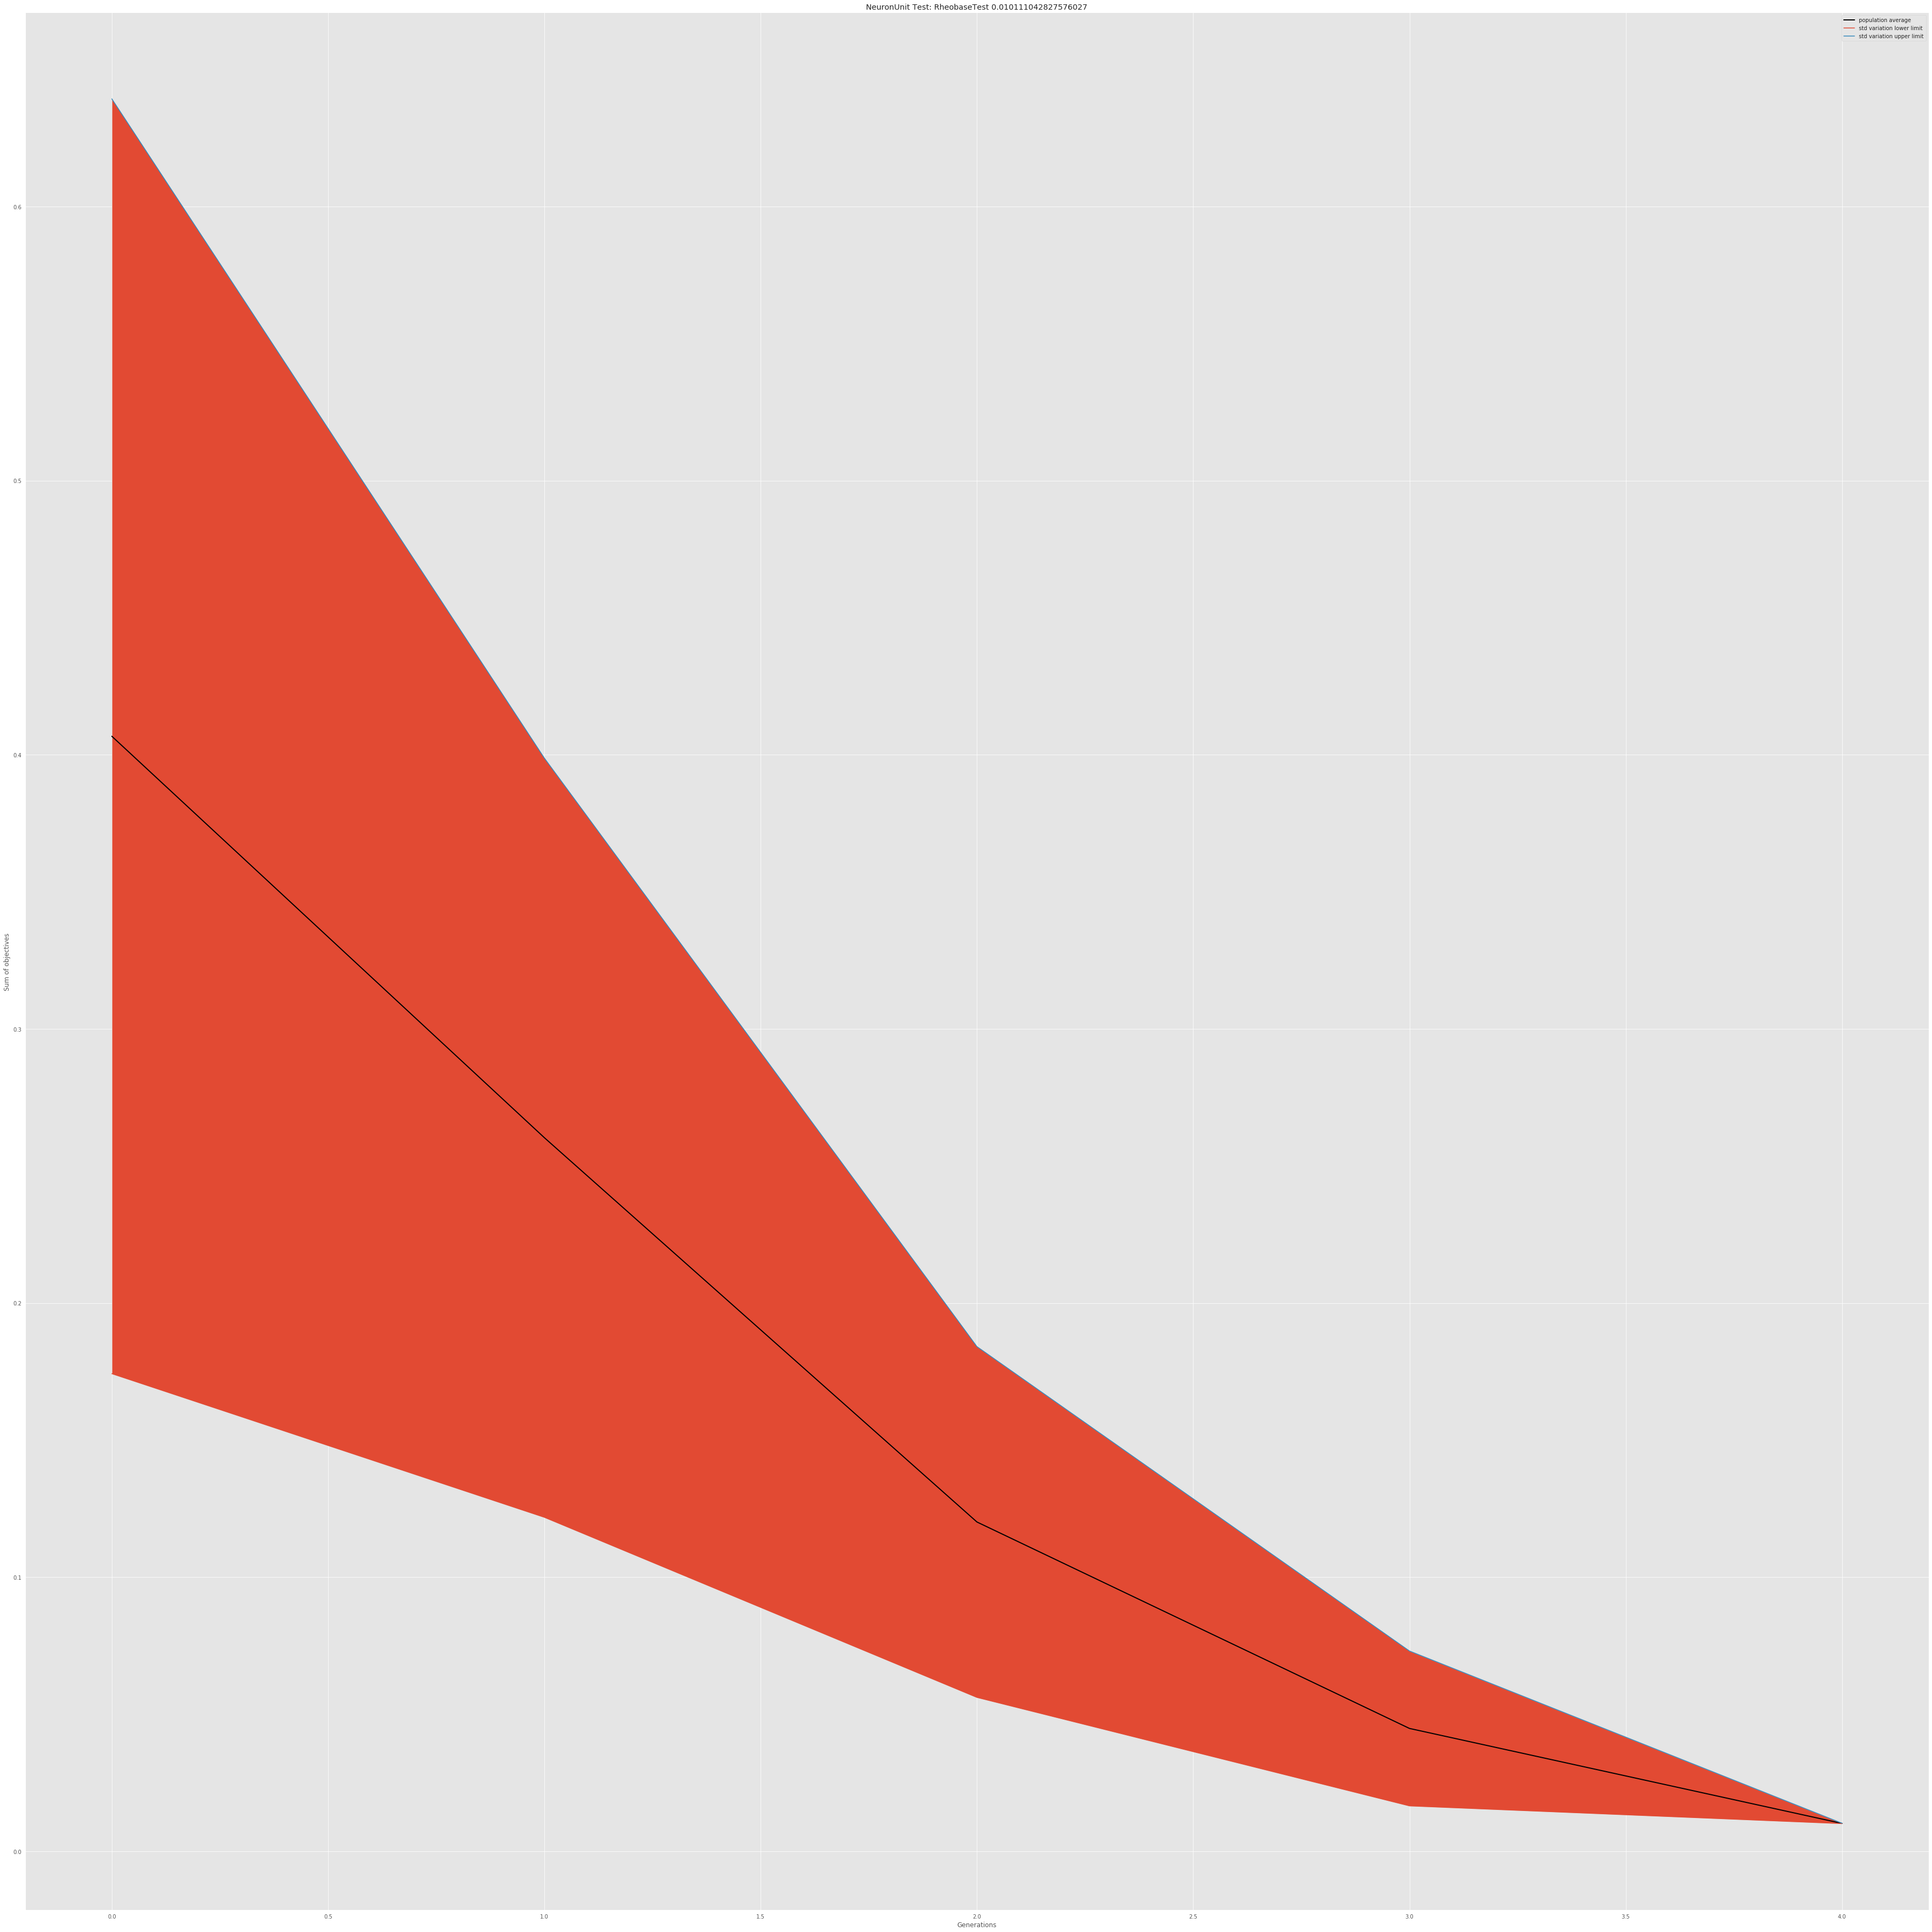

<Figure size 3600x3600 with 0 Axes>

<Figure size 432x288 with 0 Axes>

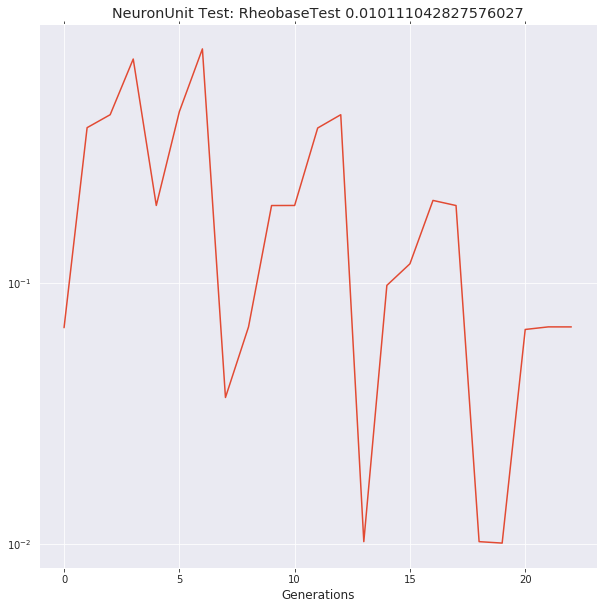

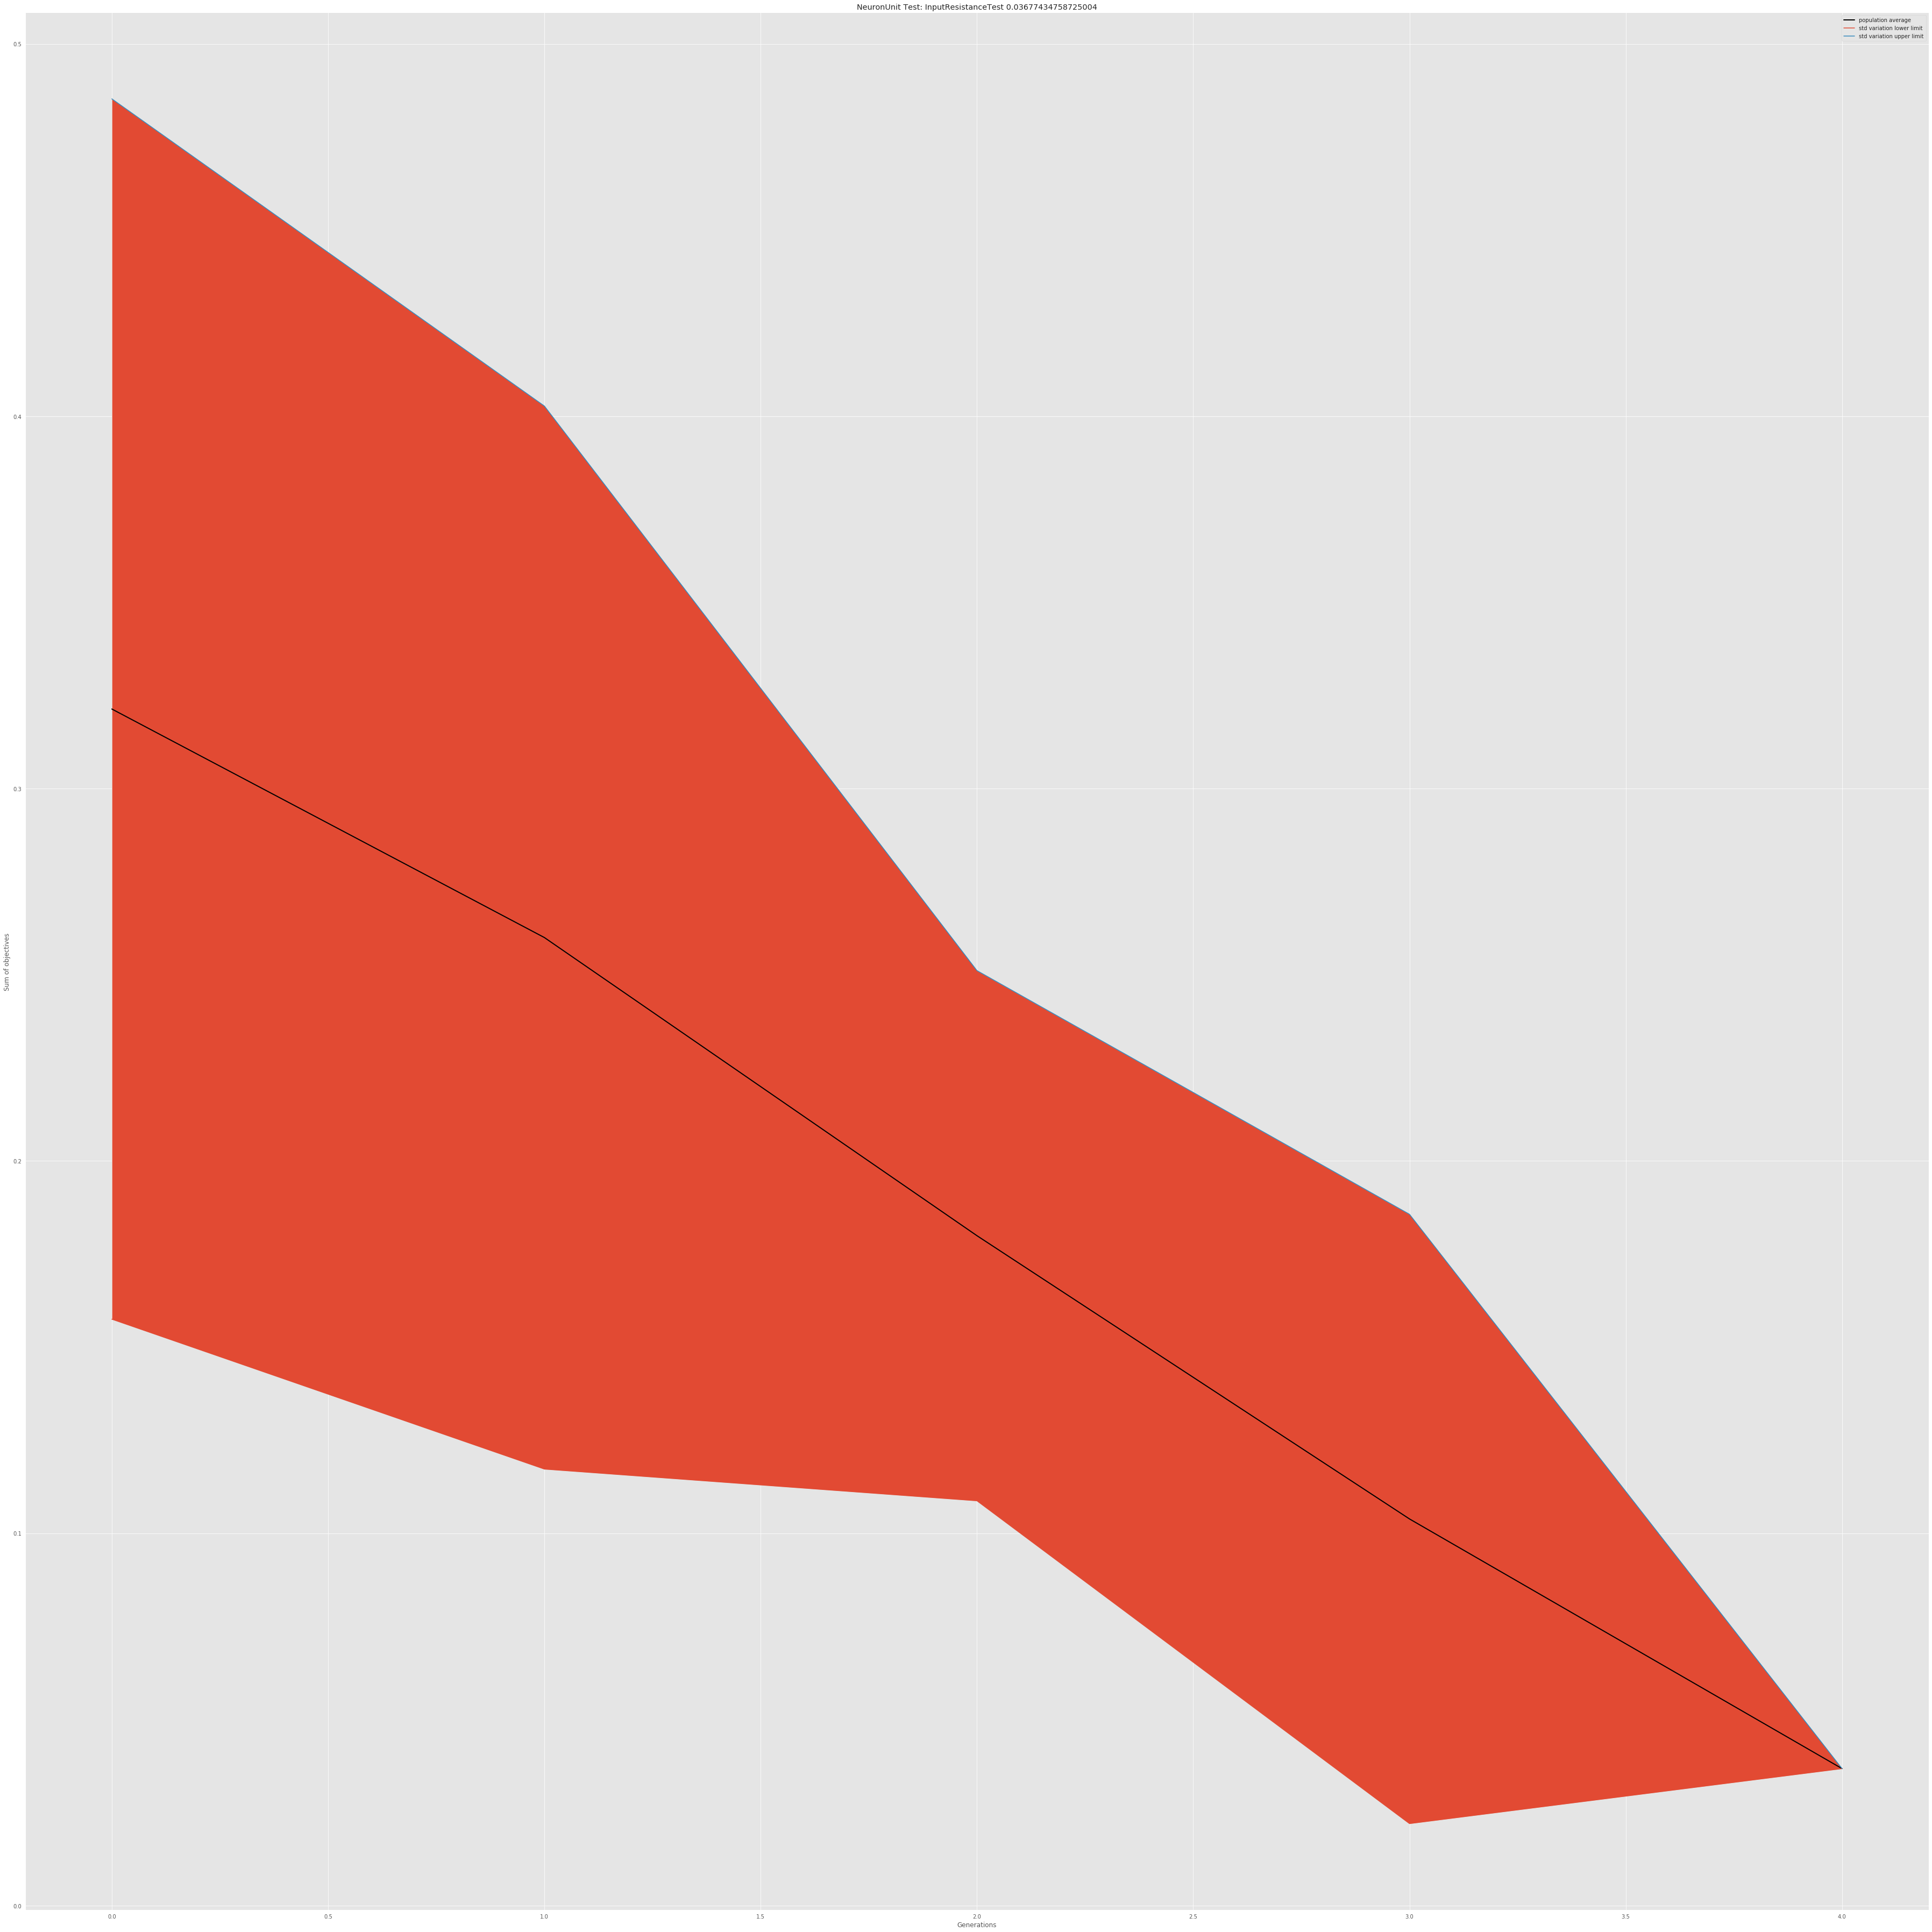

<Figure size 3600x3600 with 0 Axes>

<Figure size 432x288 with 0 Axes>

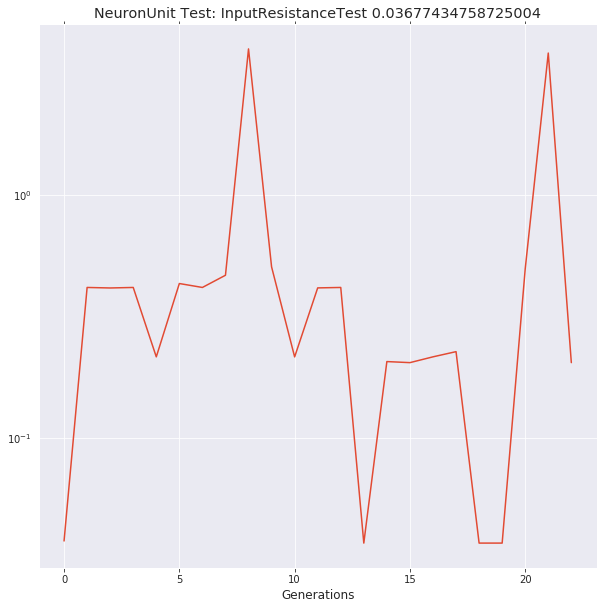

In [12]:
#class TestSum(unittest.TestCase):
results = {}
tests = {}
ut = unittest.TestCase()
for  k in simulated_data_tests.keys():
    tests[k] = hide_imports.TSD([simulated_data_tests[k]])
    results[k] = tests[k].optimize(OM.boundary_dict,backend=OM.backend,\
            protocol={'allen': False, 'elephant': True},\
                MU=5,NGEN=5,plot=True)
    opt = results[k]['pf'][0].dtc
    display(opt.obs_preds)
    try:
        ut.assertLess(opt.obs_preds['total']['scores'],0.015)
    except:
        y1 = [i['avg'][0] for i in results[k]['log']]
        y = [i['min'][0] for i in results[k]['log']]
        x = [i['gen'] for i in results[k]['log']]

        out = linregress(x, y)
        ut.assertLess(out[0],-0.005465789127244809)
        out = linregress(x, y1)
        ut.assertLess(out[0],-0.005465789127244809)


In [ ]:
results = []
tests = []
for i,k in enumerate(simulated_data_tests.keys()):
    for j,l in enumerate(simulated_data_tests.keys()):
        if i!=j:
            tests = None
            tests = hide_imports.TSD([simulated_data_tests[k],simulated_data_tests[l]])
            results.append(tests.optimize(OM.boundary_dict,backend=OM.backend,\
                    protocol={'allen': False, 'elephant': True},\
                        MU=5,NGEN=5,plot=True))
            opt = results[-1]['pf'][0].dtc
            front = [p.dtc for p in results[-1]['pf']]
            display(opt.obs_preds)
            try:
                ut.assertLess(opt.obs_preds['total']['scores'],0.0125)
            except:
                y1 = [i['avg'][0] for i in results[k]['log']]
                y = [i['min'][0] for i in results[k]['log']]
                x = [i['gen'] for i in results[k]['log']]

                out = linregress(x, y)
                ut.assertLess(out[0],-0.005465789127244809)
                out = linregress(x, y1)
                ut.assertLess(out[0],-0.005465789127244809)


            #inject_and_plot_model(opt)
            #inject_and_plot_passive_model(opt)
            #check_match_front(target,front[0:10])
            #opt.obs_preds


In [ ]:
results = []
tests = []
for i,k in enumerate(simulated_data_tests.keys()):
    for j,l in enumerate(simulated_data_tests.keys()):
        for m,n in enumerate(simulated_data_tests.keys()):
            if i!=j and i!=m and m!=j:
                tests = None
                tests = hide_imports.TSD([simulated_data_tests[m],simulated_data_tests[k],simulated_data_tests[l]])
                results.append(tests.optimize(OM.boundary_dict,backend=OM.backend,\
                        protocol={'allen': False, 'elephant': True},\
                            MU=50,NGEN=50,plot=True))
                opt = results[-1]['pf'][0].dtc
                ut.assertLess(opt.obs_preds['total']['scores'],0.0125)

                #front = [p.dtc for p in results[-1]['pf']]
                #display(opt.obs_preds)

In [ ]:
results[k].keys()
plots = tests[k].elaborate_plots(tests[k],results[k])
dtc.obs_preds
#ga_out_rh.keys()


In [ ]:

#plots.keys()

# Comence optimization of models on simulated data sets

# first lets just optimize over single objective functions at a time.

In [ ]:

both = hide_imports.TSD([simulated_data_tests["TimeConstantTest"],simulated_data_tests["RheobaseTest"]]).optimize(OMObjects[0].boundary_dict,backend=OMObjects[0].backend,\
        protocol={'allen': False, 'elephant': True},\
            MU=30,NGEN=30,plot=True)
both = both['pf'][0].dtc
both.obs_preds


In [ ]:

three = hide_imports.TSD([simulated_data_tests["InjectedCurrentAPAmplitudeTest"],simulated_data_tests["TimeConstantTest"],simulated_data_tests["RheobaseTest"]]).optimize(OMObjects[0].boundary_dict,backend=OMObjects[0].backend,\
        protocol={'allen': False, 'elephant': True},\
            MU=25,NGEN=6,plot=True)


In [ ]:
#three = three['pf'][0].dtc
#three.obs_preds

# How about using all the objectives together?


In [ ]:
opt.rheobase


In [ ]:
model = opt.dtc_to_model()
score = simulated_data_tests['TimeConstantTest'].judge(model)
pred = simulated_data_tests['TimeConstantTest'].prediction
print(pred)

In [ ]:
from neuronunit.optimisation.algorithms import cleanse
seed_pop = cleanse(copy.copy(ga_out['pf'))
OMObjects.MU =6
ga_out = simulated_data_tests.optimize(OMObjects[0].boundary_dict,backend=OMObjects[0].backend,\
        protocol={'allen': False, 'elephant': True},\
            MU=6,NGEN=6,seed_pop=seed_pop)

##### 